In [1]:
%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as scaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import RandomizedSearchCV as RSCV 
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.tree import DecisionTreeRegressor as DT 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor as RF 
from sklearn.ensemble import GradientBoostingRegressor as XGB
from sklearn.ensemble import VotingRegressor
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')

CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
data1=pd.read_csv('student-mat.csv')
data1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
data2=pd.read_csv('student-por.csv')
data2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
data3=data1.merge(data2, how='inner', on=("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))
data3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

In [6]:
D= {'address': {'U':'Urban', 'R':'Rural'},
           'famsize': {'LE3':'Less then 3', 'GT3':'Greater then 3'},
           'Pstatus': {'T':'Together', 'A':'Apart'}}

for column in list(D.keys()):
    data3[column] = data3[column].map(D[column])

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- These grades are related with the course subject, Math or Portuguese:

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

 Additional note: there are several (382) students that belong to both datasets .
 These students can be identified by searching for identical attributes
 that characterize each student, as shown in the annexed R file.

## 1. EDA

1. Consumo di alcolici tra maschi e femmine
2. Consumo di alcolici giornaliero e nel weekend e come questo influisce sul grade
3. mettere insieme in un unico dataset le info degli studenti di matematica e di portoghese (382 su 395) e indagare
   come il consumo di alcool possa incidere sull'apprendimento di materie scentifiche rispetto alle materie umanistiche
4. correlazione tra assunzione di alcool e stato coniugale dei genitori
5. current health status rispetto a livello alcolico assunto
6. correlazione tra chi aspira a un'educazione più elevata con l'assunzione alcolica
7. correlazione di family relation con l'assunzione alcolica

## Overview delle variabili categoriche in comune tra i due dataset

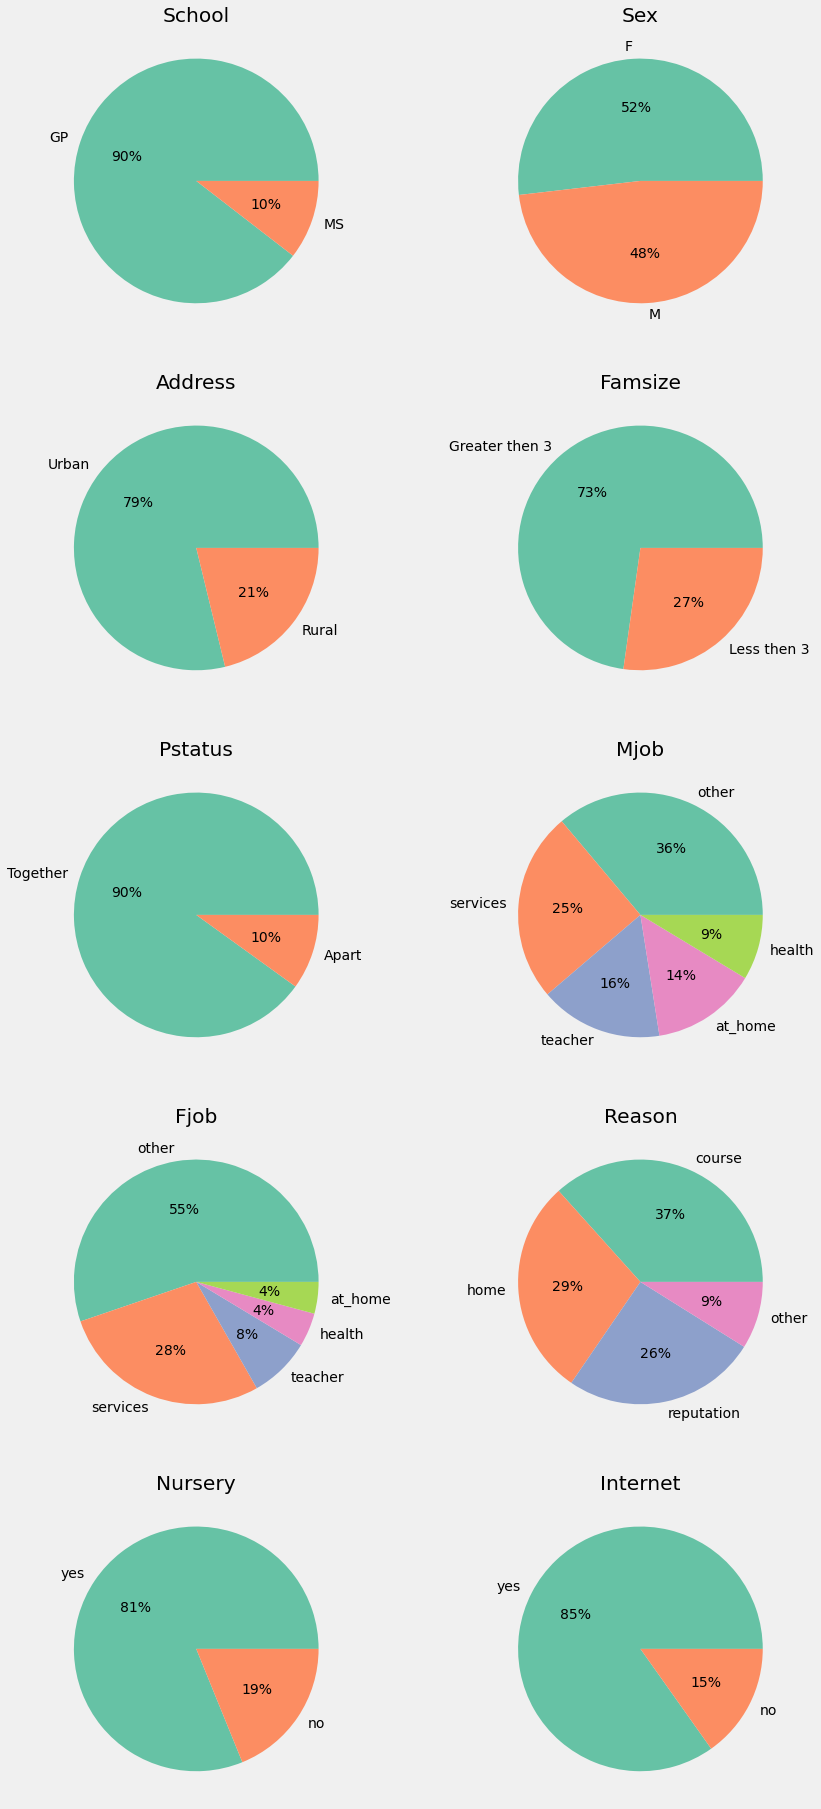

In [7]:
categorical=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','nursery','internet']

f, axes=plt.subplots(2,5,figsize=(13,43))
for i,feature in enumerate(categorical):
    plt.subplot(7,2,i+1)
    plt.pie(data3[feature].value_counts(),
       labels=data3[feature].value_counts().index,
       autopct='%.0f%%',
       colors=sns.color_palette('Set2'))
    plt.title(feature.capitalize())
plt.show()

## Controlliamo la distribuzione dell'età

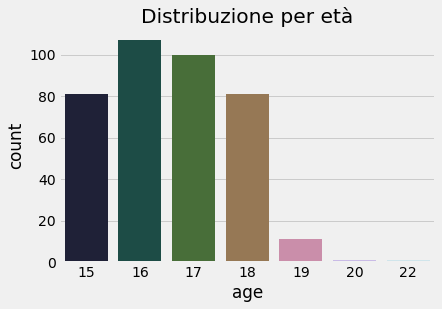

In [8]:
sns.countplot(data3.age, palette ='cubehelix')
plt.title('Distribuzione per età')
plt.show()

## Distribuzione per sesso

Ci interessa solo la votazione G3, dunque cancelliamo le altre 2 sia per il portoghese che per matematica

In [9]:
data3.drop(['G1_x', 'G2_x','G1_y','G2_y'], axis=1, inplace=True)

### 1. Consumo di alcolici tra maschi e femmine

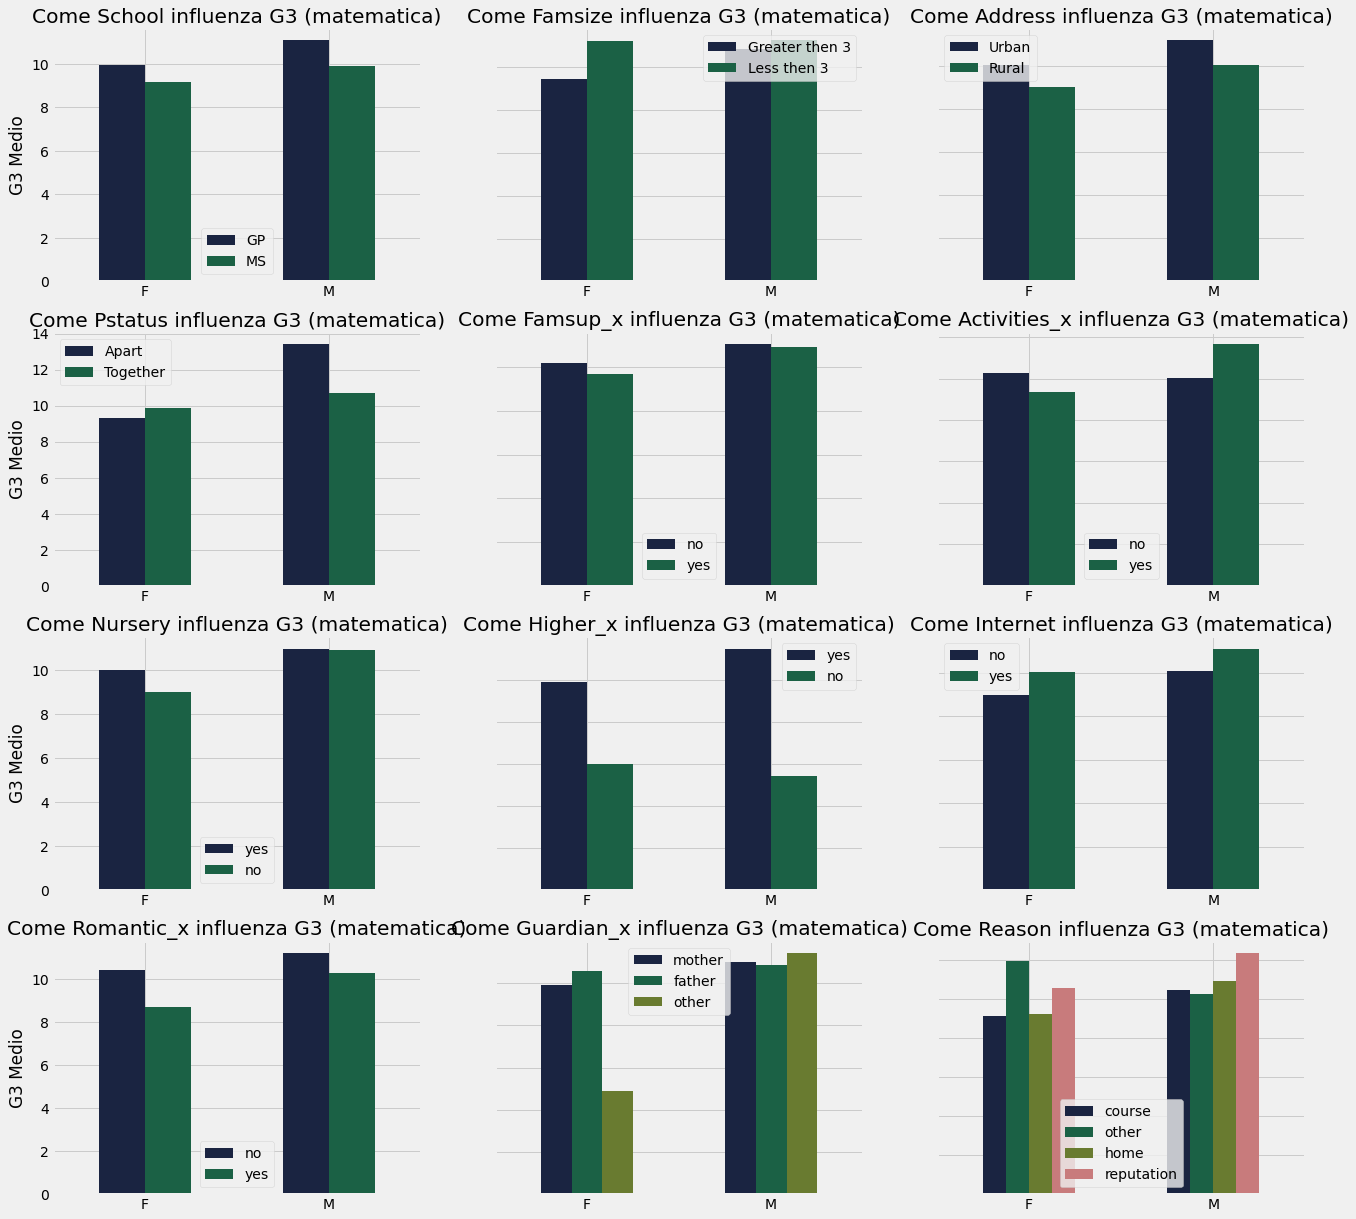

In [10]:
f, axes=plt.subplots(4,3,figsize=(20,20))

for i, feature in enumerate(['school','famsize','address','Pstatus', 'famsup_x', 'activities_x', 'nursery',
       'higher_x', 'internet', 'romantic_x','guardian_x', 'reason']):
    pd.DataFrame(
        {sex:{item: data3[(data3[feature]==item)&(data3.sex==sex)]['G3_x'].mean() for item in data3[feature].unique(
       )} for sex in data3.sex.unique()}).transpose().plot(kind='bar', rot=0, ax=axes[i//3, i%3],
            title='Come '+feature.capitalize()+' influenza G3 (matematica)', ylabel='G3 Medio', sharey=True, color=sns.color_palette('cubehelix'))
    
plt.show()

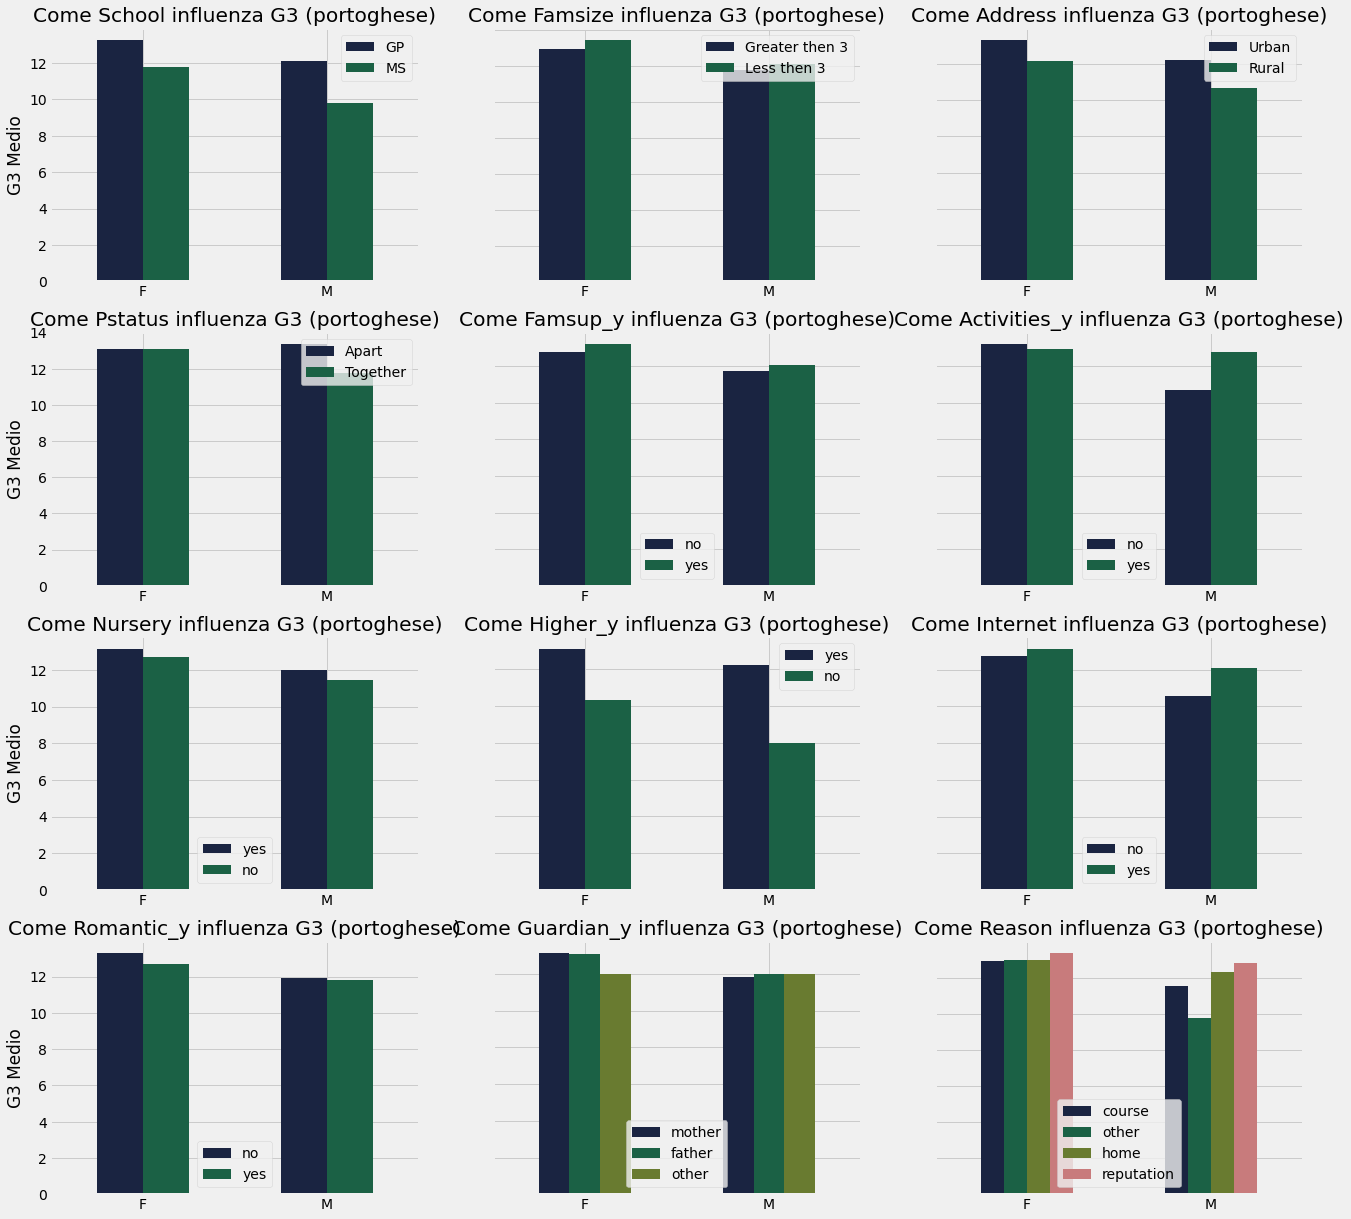

In [11]:
f, axes=plt.subplots(4,3,figsize=(20,20))

for i, feature in enumerate(['school','famsize','address','Pstatus', 'famsup_y', 'activities_y', 'nursery',
       'higher_y', 'internet', 'romantic_y','guardian_y', 'reason']):
    pd.DataFrame(
        {sex:{item: data3[(data3[feature]==item)&(data3.sex==sex)]['G3_y'].mean() for item in data3[feature].unique(
       )} for sex in data3.sex.unique()}).transpose().plot(kind='bar', rot=0, ax=axes[i//3, i%3],
            title='Come '+feature.capitalize()+' influenza G3 (portoghese)', ylabel='G3 Medio', sharey=True, color=sns.color_palette('cubehelix'))
    
plt.show()

In [12]:
data3.groupby('sex')[['Dalc_x', 'Walc_x']].mean()

,Dalc_x,Walc_x
sex,,
F,1.262626,1.964646
M,1.701087,2.619565


In [13]:
data3.groupby('sex')[['Dalc_y', 'Walc_y']].mean()

,Dalc_y,Walc_y
sex,,
F,1.267677,1.979798
M,1.701087,2.625000


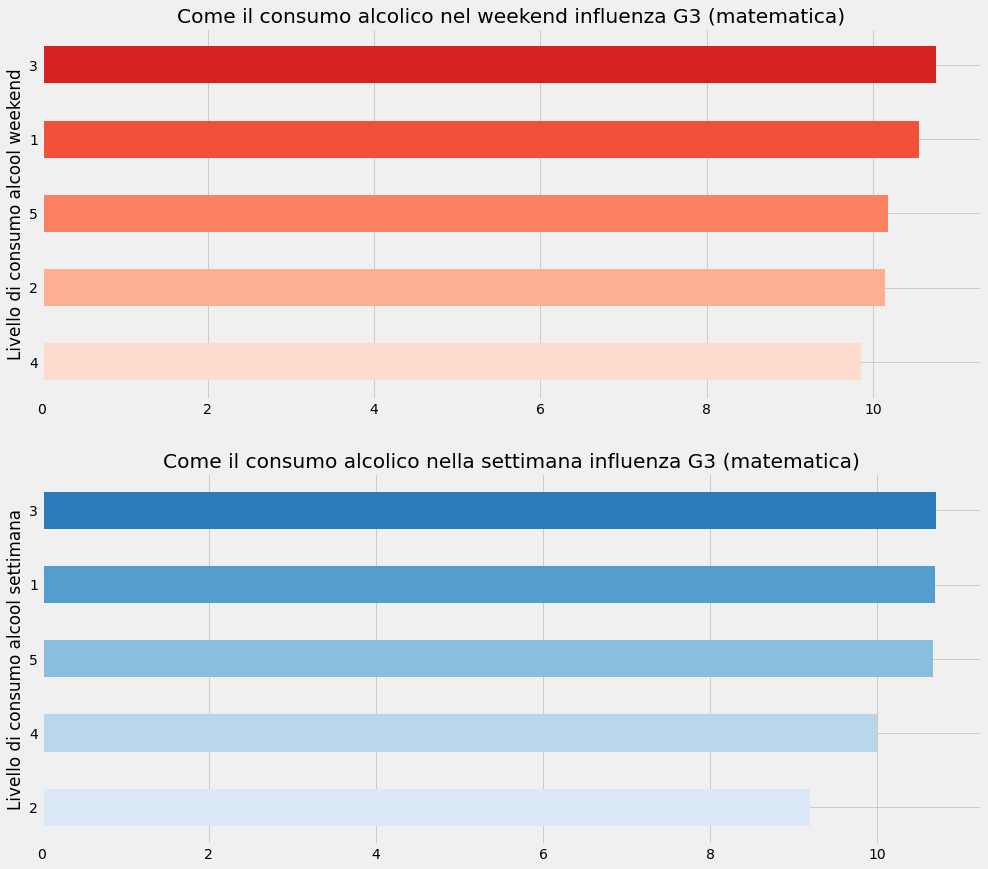

In [14]:
f, axes=plt.subplots(2,1,figsize=(15,14))
axe = axes.ravel()

pd.Series({item:data3[data3.Walc_x==item]['G3_x'].mean() for item in data3.Walc_x.unique()}).sort_values().plot(kind='barh', 
            color=sns.color_palette('Reds'), title='Come il consumo alcolico nel weekend influenza G3 (matematica)',
            xlabel='Livello di consumo alcool weekend', ax=axe[0])

pd.Series({item:data3[data3.Dalc_x==item]['G3_x'].mean() for item in data3.Dalc_x.unique()}).sort_values().plot(kind='barh', 
            color=sns.color_palette('Blues'), title='Come il consumo alcolico nella settimana influenza G3 (matematica)',
            xlabel='Livello di consumo alcool settimana', ax=axe[1])



plt.show()


Il consumo di alcolici da medio a poco da un apprendimento più alto

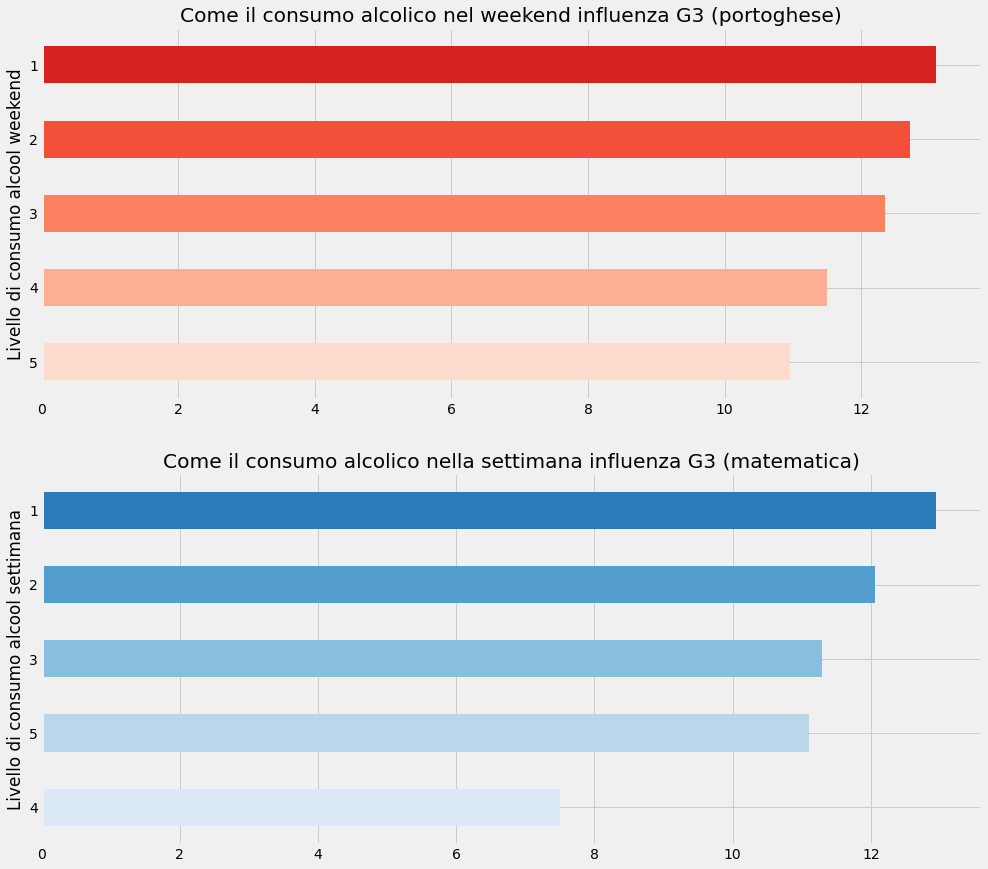

In [15]:
f, axes=plt.subplots(2,1,figsize=(15,14))
axe = axes.ravel()

pd.Series({item:data3[data3.Walc_x==item]['G3_y'].mean() for item in data3.Walc_x.unique()}).sort_values().plot(kind='barh', 
            color=sns.color_palette('Reds'), title='Come il consumo alcolico nel weekend influenza G3 (portoghese)',
            xlabel='Livello di consumo alcool weekend', ax=axe[0])

pd.Series({item:data3[data3.Dalc_x==item]['G3_y'].mean() for item in data3.Dalc_x.unique()}).sort_values().plot(kind='barh', 
            color=sns.color_palette('Blues'), title='Come il consumo alcolico nella settimana influenza G3 (matematica)',
            xlabel='Livello di consumo alcool settimana', ax=axe[1])

plt.show()

Il consumo di alcolici incide maggiormente l'apprendimento di portoghese rispetto alla matematica.

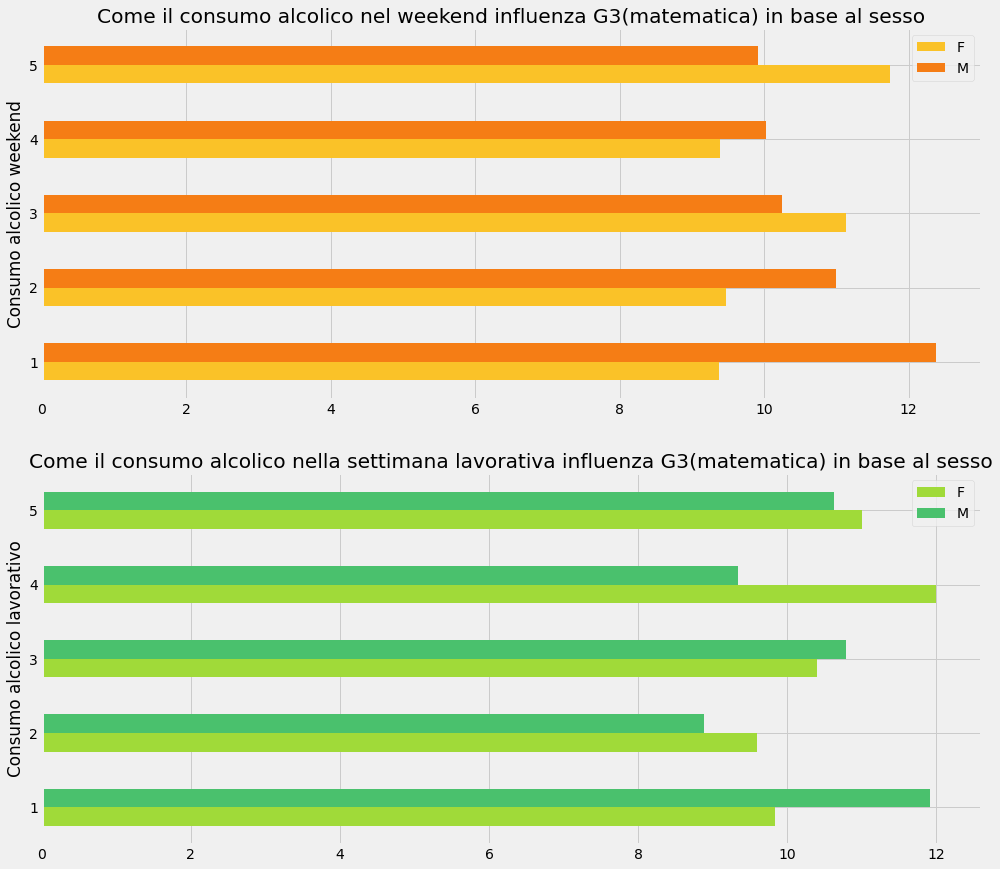

In [16]:
f, axes=plt.subplots(2,1,figsize=(15,14))

pd.DataFrame({sex:{i:data3[(data3.Walc_x==i)&(data3.sex==sex)]['G3_x'].mean() for i in range(1,6)} for sex in data3.sex.unique()}).plot(
    kind='barh', color=sns.color_palette('inferno_r'), title='Come il consumo alcolico nel weekend influenza G3(matematica) in base al sesso',
            xlabel='Consumo alcolico weekend', ax=axes[0])

pd.DataFrame({sex:{i:data3[(data3.Dalc_x==i)&(data3.sex==sex)]['G3_x'].mean() for i in range(1,6)} for sex in data3.sex.unique()}).plot(
    kind='barh', color=sns.color_palette('viridis_r'), title='Come il consumo alcolico nella settimana lavorativa influenza G3(matematica) in base al sesso',
            xlabel='Consumo alcolico lavorativo', ax=axes[1])

plt.show()

Per matematica: sembra che il sesso maschile sia maggiormente colpito dall'utilizzo dell'alcool sulle prestazioni scolastiche rispetto alle donne. può anche darsi che per quanto riguarda il set delle donne siano state prese coloro più capaci e quindi vada a falsificare un po' il rendimento

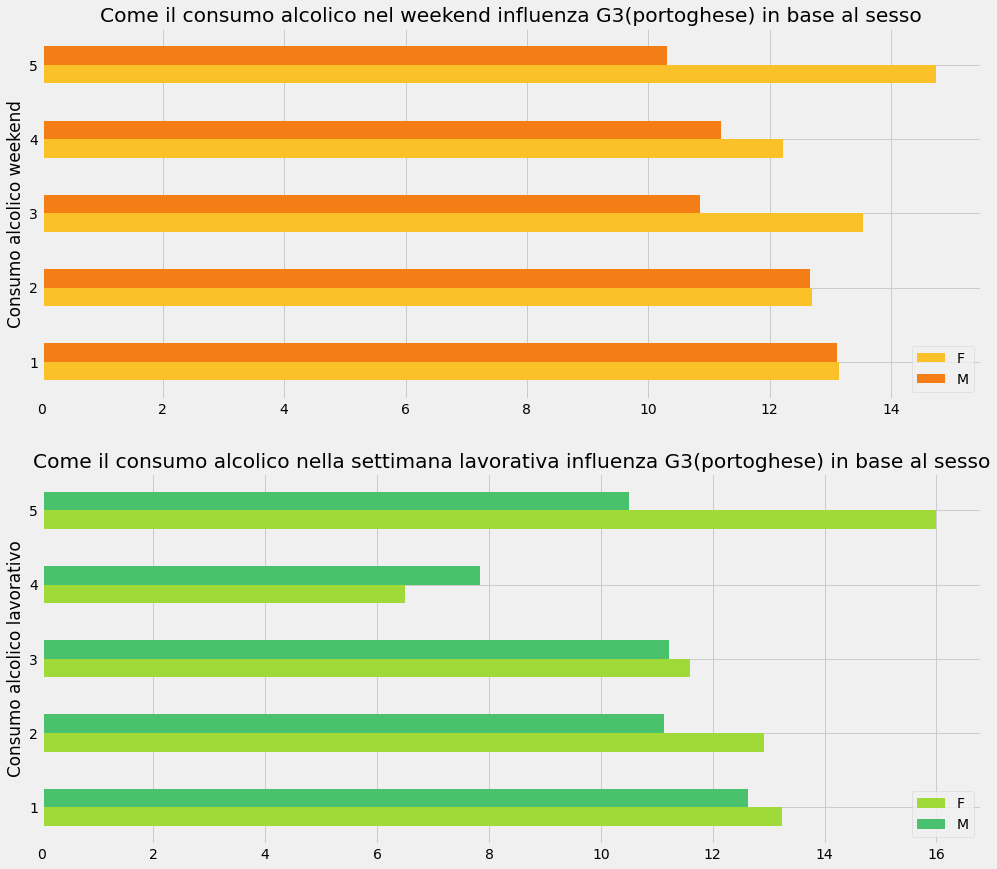

In [17]:
f, axes=plt.subplots(2,1,figsize=(15,14))

pd.DataFrame({sex:{i:data3[(data3.Walc_y==i)&(data3.sex==sex)]['G3_y'].mean() for i in range(1,6)} for sex in data3.sex.unique()}).plot(
    kind='barh', color=sns.color_palette('inferno_r'), title='Come il consumo alcolico nel weekend influenza G3(portoghese) in base al sesso',
            xlabel='Consumo alcolico weekend', ax=axes[0])

pd.DataFrame({sex:{i:data3[(data3.Dalc_y==i)&(data3.sex==sex)]['G3_y'].mean() for i in range(1,6)} for sex in data3.sex.unique()}).plot(
    kind='barh', color=sns.color_palette('viridis_r'), title='Come il consumo alcolico nella settimana lavorativa influenza G3(portoghese) in base al sesso',
            xlabel='Consumo alcolico lavorativo', ax=axes[1])

plt.show()

Per portoghese succede la stessa cosa di ciò che è stato spiegato per matematica, ma qui i due sessi hanno un comportamento opposto: mentre le donne sembra che il consumo di alcolici vada ad influire positivamente sulle prestazioni per gli uomini succede ciò che ci aspetteremmo, ovvero che all'aumentare dell'assunzione di alcool troviamo un decremento delle prestazioni scolastiche

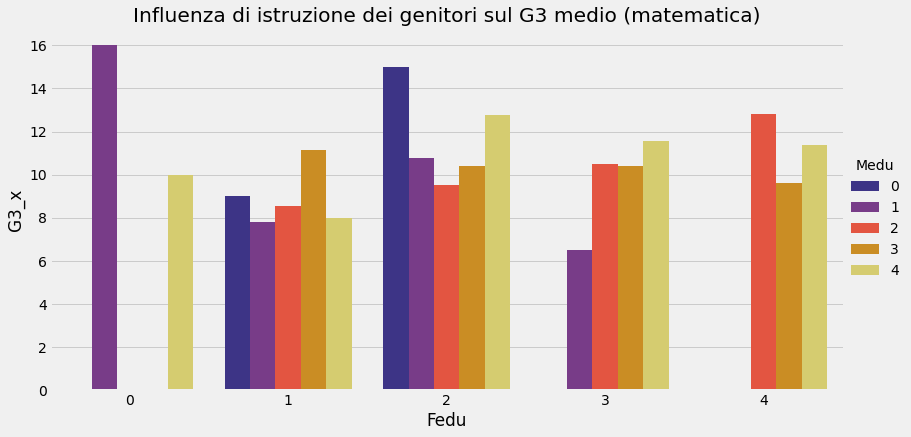

In [18]:
sns.catplot(data=data3, x='Fedu', y='G3_x', hue='Medu', kind='bar', ci=False, height=6, aspect=2, palette='CMRmap')
plt.title('Influenza di istruzione dei genitori sul G3 medio (matematica)');

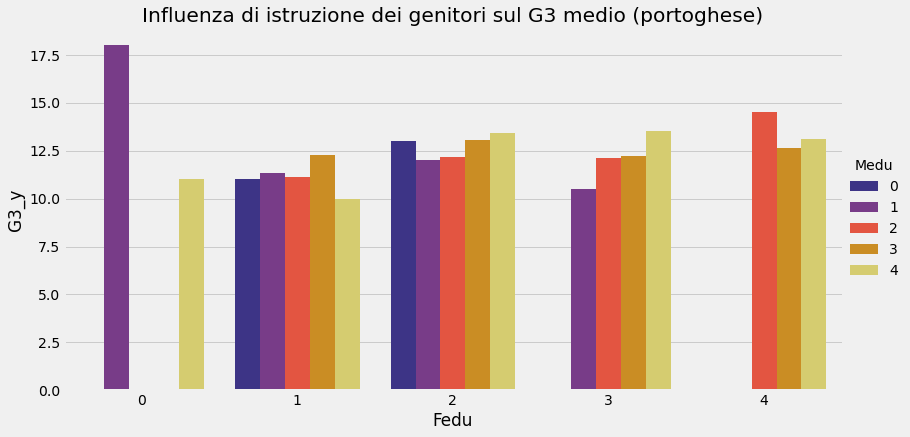

In [19]:
sns.catplot(data=data3, x='Fedu', y='G3_y', hue='Medu', kind='bar', ci=False, height=6, aspect=2, palette='CMRmap')
plt.title('Influenza di istruzione dei genitori sul G3 medio (portoghese)');

A parte un andamento anomalo nella prima fascia, ovvero quella con l'istruzione dei genitori più bassa,
in generale all'aumentare dell'istruzione dei genitori, troviamo un aumento del rendimento scolastico.
La spiegazione relativa alla prima fascia potrebbe essere una sorta di riscatto per gli studenti che non hanno avuto le stesse possibilità 
di altri e quindi questo porta a far scattare un senso di rivalsa.

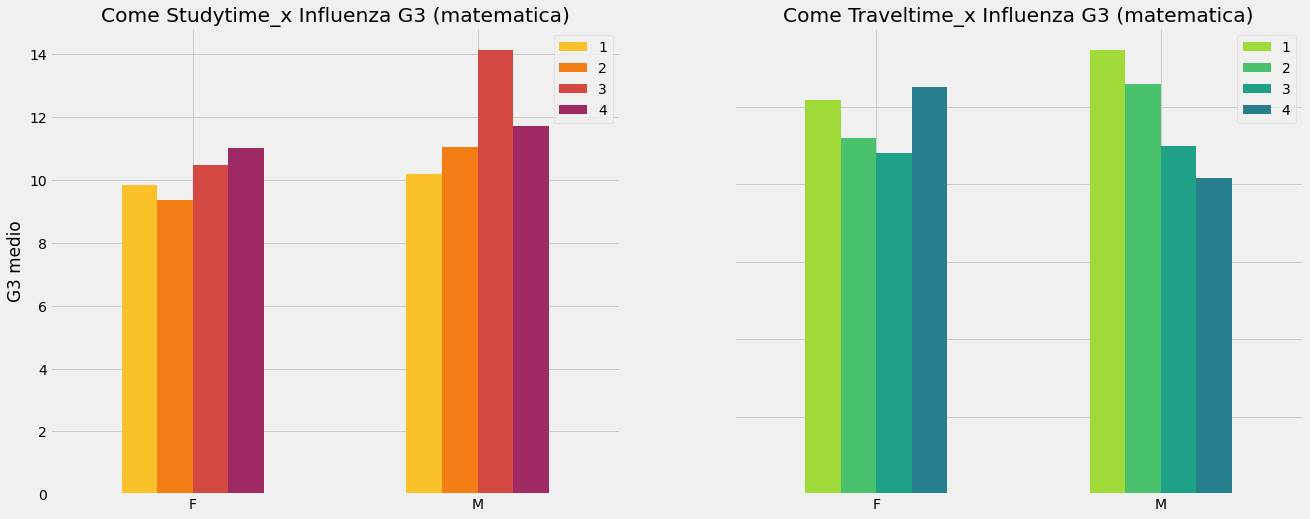

In [20]:
palette=['inferno_r', 'viridis_r']

f, axes=plt.subplots(1,2,figsize=(20,8))
for j,feature in enumerate(['studytime_x', 'traveltime_x']):
    pd.DataFrame({sex:{i:data3[(data3[feature]==i)&(data3.sex==sex)]['G3_x'].mean() for i in range(1,5)} for sex in data3.sex.unique(
    )}).transpose().plot(kind='bar', rot=0, ax=axes[j], color=sns.color_palette(palette[j]), 
    title='Come '+feature.capitalize()+' Influenza G3 (matematica)', ylabel='G3 medio', sharey=True)

Per matematica l'aumento dello studio migliora le prestazioni e una diminuzione di svago quale i viaggi aumenta le prestazioni negli uomini. 
Nelle donne l'andamento scolastico sembra avere una correlazione lineare con lo studio, diverso è invece la relazione con lo svago soprattutto i viaggi in quanto sembra
che un maggior svago porti a risultati migliori

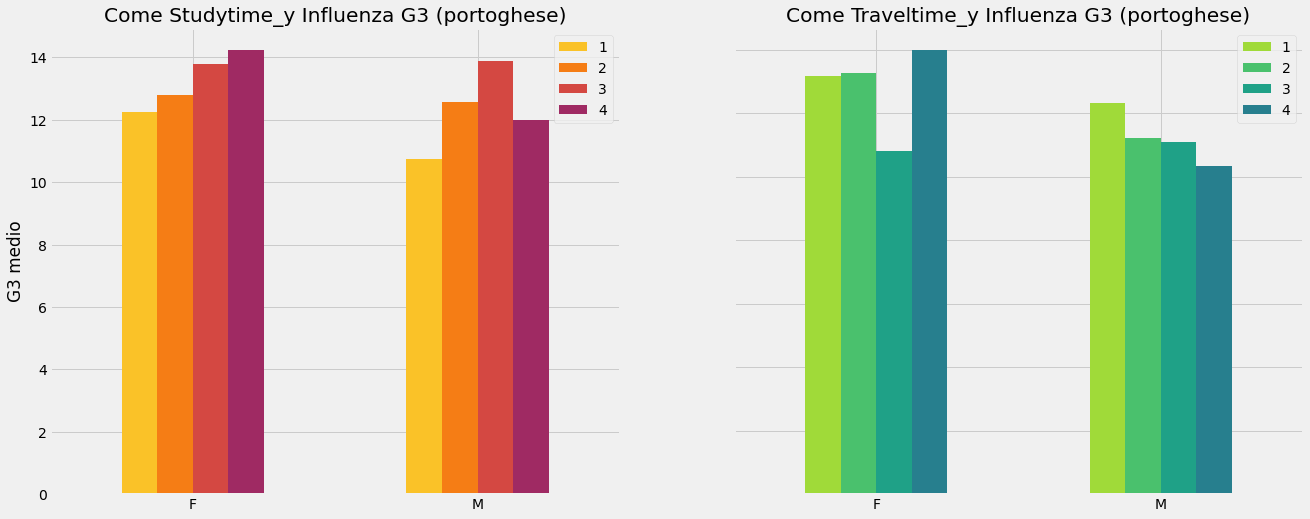

In [21]:
palette=['inferno_r', 'viridis_r']

f, axes=plt.subplots(1,2,figsize=(20,8))
for j,feature in enumerate(['studytime_y', 'traveltime_y']):
    pd.DataFrame({sex:{i:data3[(data3[feature]==i)&(data3.sex==sex)]['G3_y'].mean() for i in range(1,5)} for sex in data3.sex.unique(
    )}).transpose().plot(kind='bar', rot=0, ax=axes[j], color=sns.color_palette(palette[j]), 
    title='Come '+feature.capitalize()+' Influenza G3 (portoghese)', ylabel='G3 medio', sharey=True)

Per portoghese l'aumento dello studio migliora le prestazioni e una diminuzione di svago quale i viaggi aumenta le prestazioni negli uomini. 
Nelle donne l'andamento scolastico sembra avere una correlazione lineare con lo studio, diverso è invece la relazione con lo svago soprattutto i viaggi in quanto sembra
che un maggior svago porti a risultati migliori

## 2. ML 

Si percorrono 2 strade:
   
           1. problema di regressione: predire la colonna 'Media'
           2. problema di clusterizzazione: scegliere dei cluster sulle features dei dataset per posporre in problema di           classificazione 
   1. fare feature selections
   2. scegliere diversi algoritmi tra cui Xgboost e Randomforest e fare il tuning degli iperparametri
   3. andare a fare il training dei singoli più modello ensamble (Voting Regressor)
   4. valutare le prestazioni con MAE se Regressor

In [22]:
D= {'sex':{'M':0, 'F':1},
    'address': {'Urban':0, 'Rural':1},
    'famsize': {'Less then 3':0, 'Greater then 3':1},
    'Pstatus': {'Together':0, 'Apart':1},
           'schoolsup_x':{'no':0,'yes':1},
           'famsup_x':{'no':0,'yes':1},
           'paid_x':{'no':0,'yes':1},
           'activities_x':{'no':0,'yes':1},
           'internet':{'no':0,'yes':1},
           'romantic_x':{'no':0,'yes':1},
            'higher_x':{'no':0,'yes':1},
            'schoolsup_y':{'no':0,'yes':1},
           'famsup_y':{'no':0,'yes':1},
           'paid_y':{'no':0,'yes':1},
           'activities_y':{'no':0,'yes':1},
             'nursery':{'no':0,'yes':1}}

for column in list(D.keys()):
    data3[column] = data3[column].map(D[column])

In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    int64 
 2   age           382 non-null    int64 
 3   address       382 non-null    int64 
 4   famsize       382 non-null    int64 
 5   Pstatus       382 non-null    int64 
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    int64 
 16  famsup_x      382 non-null    int64 
 17  paid_x        382 non-null    int64 
 18  activities_x  382 non-null    int64 
 19  nursery 

In [24]:
data3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G3_y
0,GP,1,18,0,1,1,4,4,at_home,teacher,...,yes,no,4,3,4,1,1,3,4,11
1,GP,1,17,0,1,0,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,1,15,0,0,0,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,1,15,0,1,0,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,1,16,0,1,0,3,3,other,other,...,yes,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,1,18,0,0,0,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
378,MS,1,18,0,1,0,1,1,other,other,...,yes,yes,3,4,4,2,2,5,3,7
379,MS,1,18,0,1,0,1,1,other,other,...,yes,no,1,1,1,1,1,5,6,9
380,MS,0,17,0,0,0,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


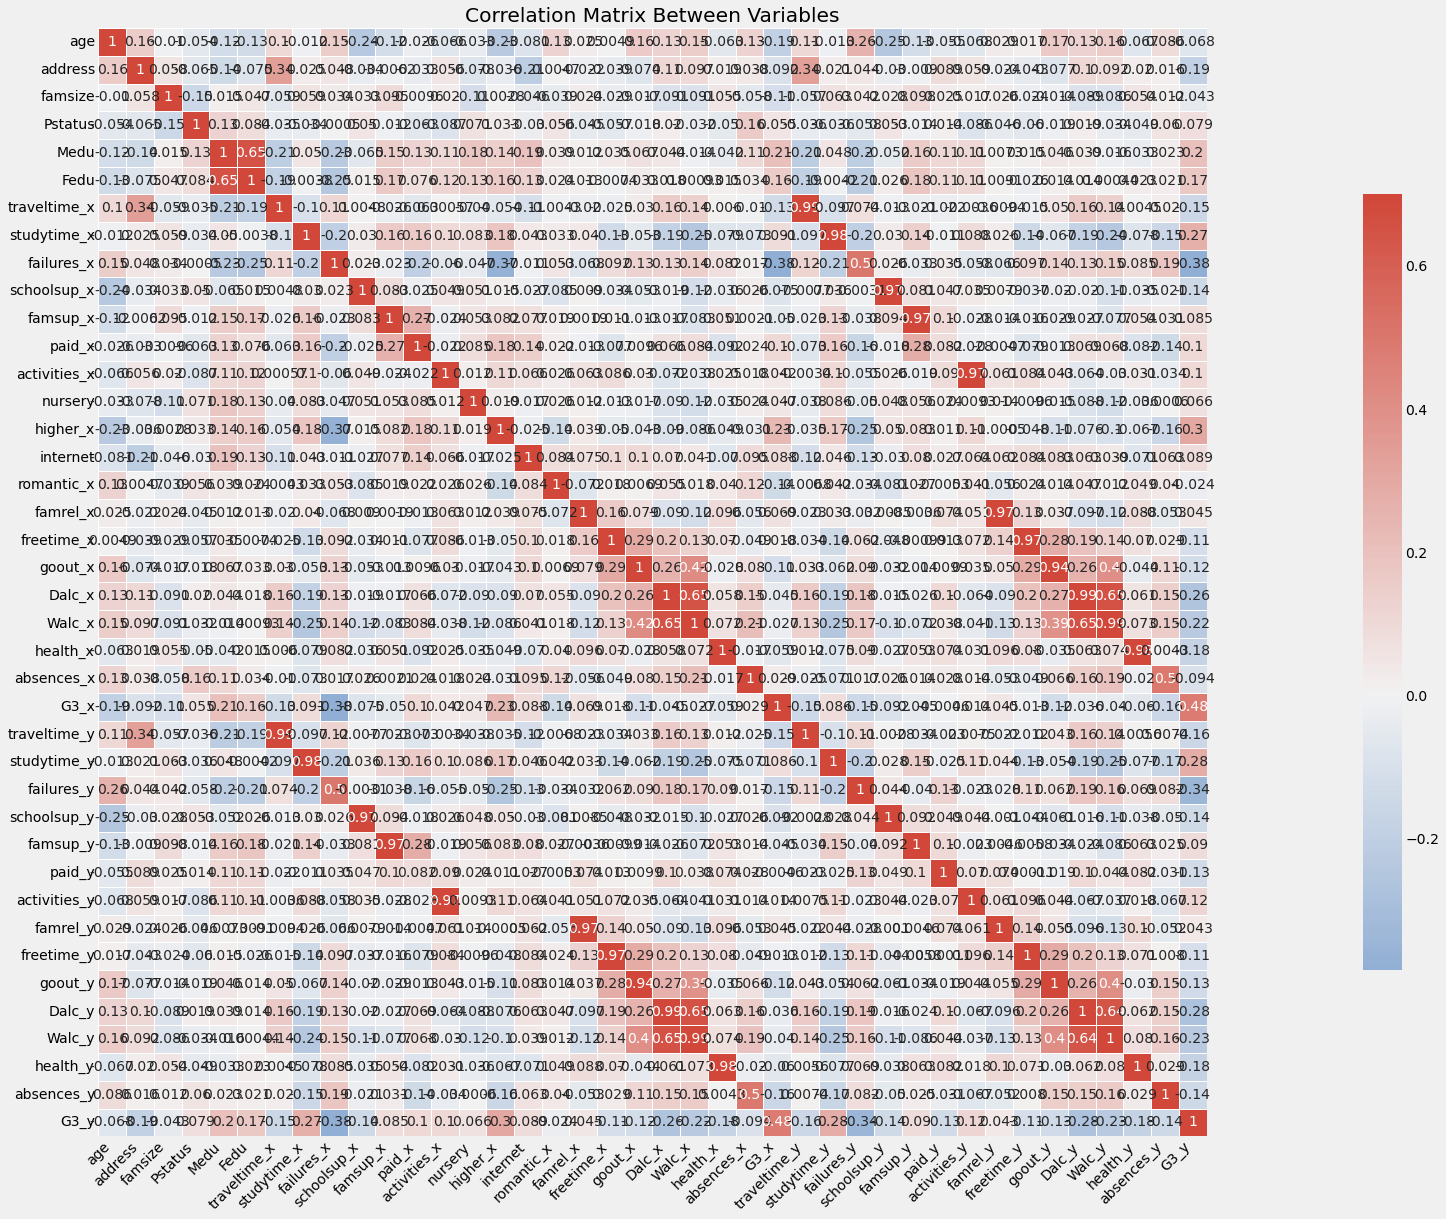

In [25]:
plt.figure(figsize=(50,19))
cmap = sns.diverging_palette(250, 15, as_cmap=True)
sns.heatmap(data3.drop(['sex','school','Mjob','Fjob','reason','guardian_x','guardian_y'], axis=1).corr(),
            annot=True, vmax=.7, center=0, cmap=cmap,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})
plt.title('Correlation Matrix Between Variables')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Correlazione maggiore tra assunzione alcolica nel weekend e nei giorni lavorativi e l'educazione dei genitori e la possibilità di uscire fuori

In [26]:
dfv=pd.get_dummies(data3.drop(['G3_x','G3_y'], axis=1))  #features
dd=(data3['G3_x'].values +  data3['G3_y'].values)/2 
dfv['media']=dd
dfv

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime_x,studytime_x,failures_x,...,guardian_x_mother,guardian_x_other,guardian_y_father,guardian_y_mother,guardian_y_other,higher_y_no,higher_y_yes,romantic_y_no,romantic_y_yes,media
0,1,18,0,1,1,4,4,2,2,0,...,1,0,0,1,0,0,1,1,0,8.5
1,1,17,0,1,0,1,1,1,2,0,...,0,0,1,0,0,0,1,1,0,8.5
2,1,15,0,0,0,1,1,1,2,3,...,1,0,0,1,0,0,1,1,0,11.0
3,1,15,0,1,0,4,2,1,3,0,...,1,0,0,1,0,0,1,0,1,14.5
4,1,16,0,1,0,3,3,1,2,0,...,0,0,1,0,0,0,1,1,0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,1,18,0,0,0,3,1,1,2,0,...,1,0,0,1,0,0,1,1,0,12.0
378,1,18,0,1,0,1,1,2,2,1,...,1,0,0,1,0,0,1,0,1,3.5
379,1,18,0,1,0,1,1,2,2,1,...,1,0,0,1,0,0,1,1,0,4.5
380,0,17,0,0,0,3,1,2,1,0,...,1,0,0,1,0,0,1,1,0,13.0


In [27]:
#clustering dfv
dfv.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime_x', 'studytime_x', 'failures_x', 'schoolsup_x', 'famsup_x',
       'paid_x', 'activities_x', 'nursery', 'higher_x', 'internet',
       'romantic_x', 'famrel_x', 'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x',
       'health_x', 'absences_x', 'traveltime_y', 'studytime_y', 'failures_y',
       'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y', 'famrel_y',
       'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y',
       'school_GP', 'school_MS', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_x_father',
       'guardian_x_mother', 'guardian_x_other', 'guardian_y_father',
       'guardian_y_mother', 'guardian_y_other', 'higher_y_no', 'higher_y_yes',
       'romantic_y_no', 'roma

In [28]:
dfv=((dfv-dfv.min())/(dfv.max()-dfv.min())) 
dfv

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime_x,studytime_x,failures_x,...,guardian_x_mother,guardian_x_other,guardian_y_father,guardian_y_mother,guardian_y_other,higher_y_no,higher_y_yes,romantic_y_no,romantic_y_yes,media
0,1.0,0.428571,0.0,1.0,1.0,1.00,1.00,0.333333,0.333333,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.459459
1,1.0,0.285714,0.0,1.0,0.0,0.25,0.25,0.000000,0.333333,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.459459
2,1.0,0.000000,0.0,0.0,0.0,0.25,0.25,0.000000,0.333333,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.594595
3,1.0,0.000000,0.0,1.0,0.0,1.00,0.50,0.000000,0.666667,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.783784
4,1.0,0.142857,0.0,1.0,0.0,0.75,0.75,0.000000,0.333333,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.621622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,1.0,0.428571,0.0,0.0,0.0,0.75,0.25,0.000000,0.333333,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.648649
378,1.0,0.428571,0.0,1.0,0.0,0.25,0.25,0.333333,0.333333,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.189189
379,1.0,0.428571,0.0,1.0,0.0,0.25,0.25,0.333333,0.333333,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.243243
380,0.0,0.285714,0.0,0.0,0.0,0.75,0.25,0.333333,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.702703


In [29]:
X_PRE = data3.drop(['G3_x','G3_y'], axis=1)

In [30]:
X_PRE

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities_y,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y
0,GP,1,18,0,1,1,4,4,at_home,teacher,...,0,yes,no,4,3,4,1,1,3,4
1,GP,1,17,0,1,0,1,1,at_home,other,...,0,yes,no,5,3,3,1,1,3,2
2,GP,1,15,0,0,0,1,1,at_home,other,...,0,yes,no,4,3,2,2,3,3,6
3,GP,1,15,0,1,0,4,2,health,services,...,1,yes,yes,3,2,2,1,1,5,0
4,GP,1,16,0,1,0,3,3,other,other,...,0,yes,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,1,18,0,0,0,3,1,teacher,services,...,0,yes,no,4,3,4,1,1,1,4
378,MS,1,18,0,1,0,1,1,other,other,...,1,yes,yes,3,4,4,2,2,5,3
379,MS,1,18,0,1,0,1,1,other,other,...,1,yes,no,1,1,1,1,1,5,6
380,MS,0,17,0,0,0,3,1,services,services,...,0,yes,no,2,4,5,3,4,2,6


In [31]:
# dataset 
X=scaler().fit_transform(pd.get_dummies(X_PRE))  #features
y=(data3['G3_x'].values +  data3['G3_y'].values)/2   #labels 

In [32]:
# train-test split 
SEED=12

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=SEED)

1. Cross validation

In [33]:
models={'KNN': KNN(), 
        'DT': DT(), 
        'SVR': SVR(), 
        'RF': RF(random_state=SEED),
        'XGB': XGB(random_state=SEED)}

parameters={'KNN':{'n_neighbors':[i for i in range(3,50)]}, 
           'DT':{'max_depth':[i for i in range(1,25)]}, 
           'SVR':{'kernel':['linear', 'poly', 'rbf'], 'C':[i for i in range(101)],
                  'epsilon':[0.0001, 0.001, 0.01, 0.1], 'gamma':['scale','auto']},
           'RF':{'n_estimators':[i for i in range(10,100)],  
                'max_depth':[i for i in range(1,25)], 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]},
           'XGB':{'n_estimators':[i for i in range(10,100)],  
                'max_depth':[i for i in range(1,25)], 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}}

In [34]:
cval={}
for model in models.keys():
    cval[model]=RSCV(models[model], parameters[model], cv=10, scoring='neg_mean_absolute_error')
    cval[model].fit(X_train, y_train)
    print('The best parameters for '+model+' are: {}'.format(cval[model].best_params_))

The best parameters for KNN are: {'n_neighbors': 48}
The best parameters for DT are: {'max_depth': 3}
The best parameters for SVR are: {'kernel': 'poly', 'gamma': 'auto', 'epsilon': 0.1, 'C': 86}
The best parameters for RF are: {'n_estimators': 67, 'max_features': 0.6, 'max_depth': 11}
The best parameters for XGB are: {'n_estimators': 61, 'max_features': 0.3, 'max_depth': 2}


### Model Perfomance

In [35]:
# I redefine the models dictionary by introducing the 'best models' according to the cross validation

models['KNN']=cval['KNN'].best_estimator_

models['DT']=cval['DT'].best_estimator_

models['SVR']=cval['SVR'].best_estimator_

models['RF']=cval['RF'].best_estimator_

models['XGB']=cval['XGB'].best_estimator_


In [36]:
named_estimators = [ ("RF", models['RF']), ("XGB", models['XGB'])]
voting_rgr = VotingRegressor(named_estimators)
models['VRGR']=voting_rgr.fit(X_train, y_train)

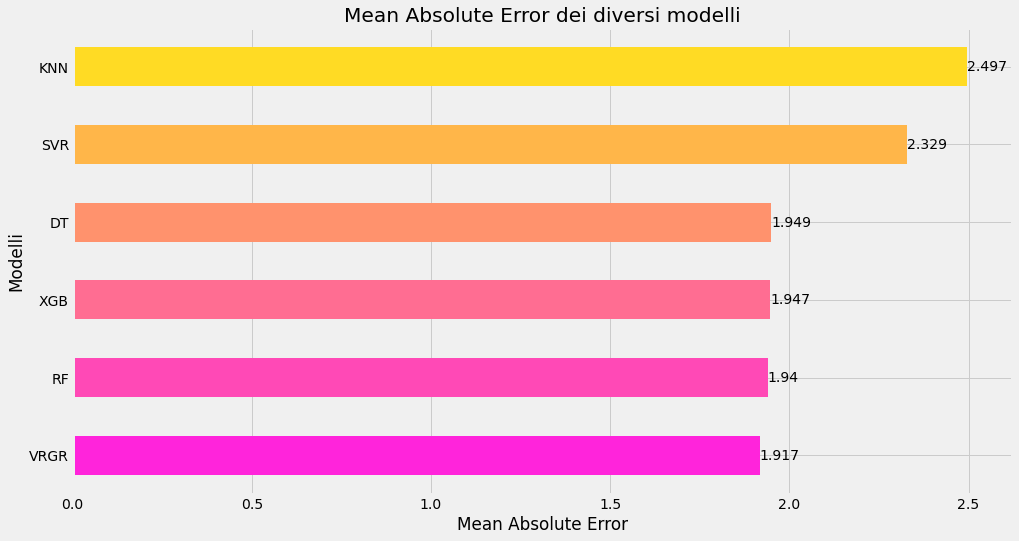

In [37]:
y_pred={}
errors={}
for model in models.keys():
    y_pred[model]=models[model].predict(X_test)
    errors[model]=round(MAE(y_test, y_pred[model]),3)
    
plt.figure(figsize=(15,8))
ax=pd.Series(errors).sort_values().plot(kind='barh', rot=0, color=sns.color_palette('spring'), 
                    title='Mean Absolute Error dei diversi modelli')

for container in ax.containers:
    ax.bar_label(container)    
plt.xlabel('Mean Absolute Error')
plt.ylabel('Modelli')
plt.show()

MAE è più robusto ai valori anomali proprio grazie all'assenza dell'elevazione al quadrato dei valori degli errori di previsioni lontane.

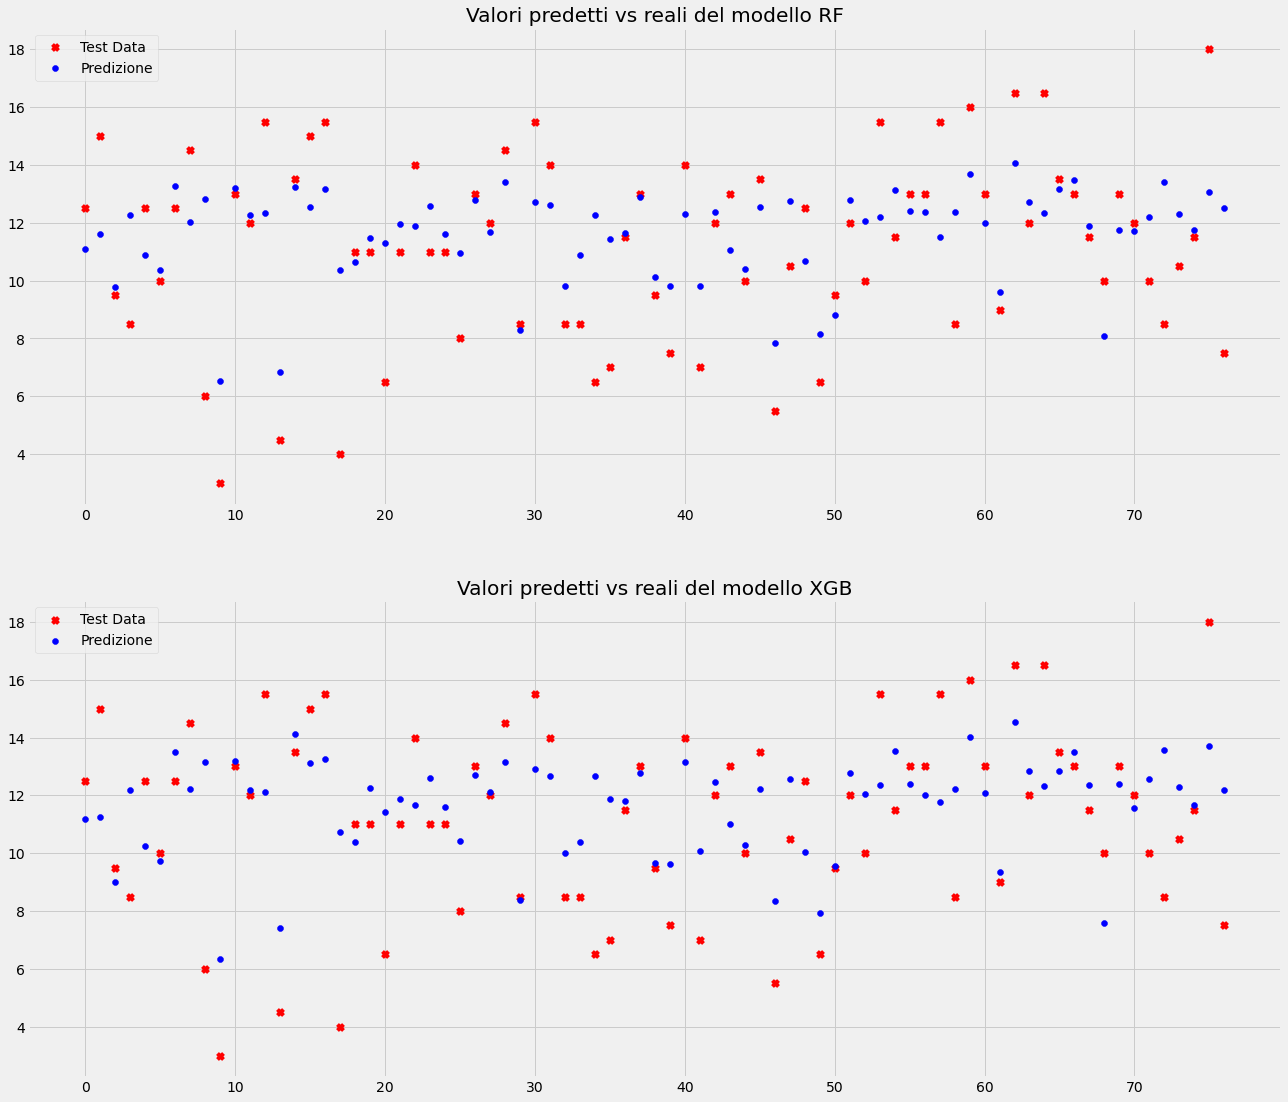

In [38]:
f, axes=plt.subplots(2,1, figsize=(20,18))

plt.subplot(2,1,1)
plt.scatter([i for i in range(len(y_test))], y_test, label='Test Data', marker='x' ,color='red')
plt.scatter([i for i in range(len(y_test))], y_pred['VRGR'], label='Predizione', marker='o' ,color='blue')
plt.title('Valori predetti vs reali del modello RF')
plt.legend()

plt.subplot(2,1,2)
plt.scatter([i for i in range(len(y_test))], y_test, label='Test Data', marker='x' ,color='red')
plt.scatter([i for i in range(len(y_test))], y_pred['RF'], label='Predizione', marker='o' ,color='blue')
plt.title('Valori predetti vs reali del modello XGB')
plt.legend()

plt.show()

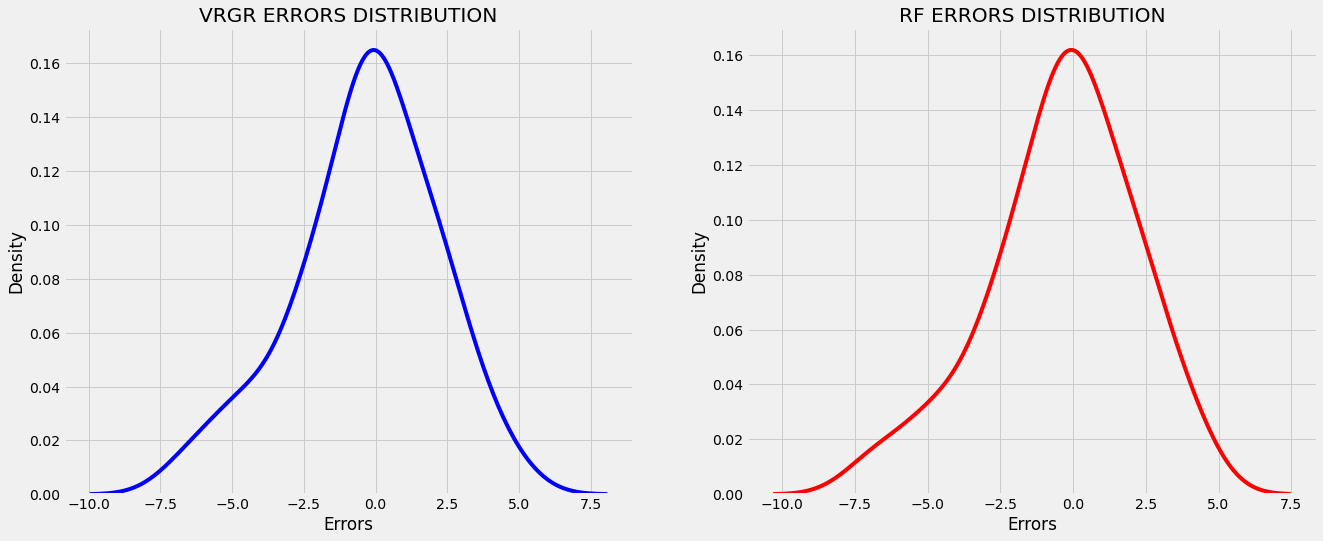

In [39]:
dist_errors={}
for model in models.keys():
    dist_errors[model]=(y_test-y_pred[model])
    
colors=['blue', 'red']

f, axes=plt.subplots(1,2,figsize=(20,8))

for i,model in enumerate(['VRGR', 'RF']):
    sns.distplot(dist_errors[model], ax=axes[i], axlabel='Errors', color=colors[i], hist=False).set(
        title=model+' ERRORS DISTRIBUTION')
    
plt.show() 

### PCA

In [40]:
dfv

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime_x,studytime_x,failures_x,...,guardian_x_mother,guardian_x_other,guardian_y_father,guardian_y_mother,guardian_y_other,higher_y_no,higher_y_yes,romantic_y_no,romantic_y_yes,media
0,1.0,0.428571,0.0,1.0,1.0,1.00,1.00,0.333333,0.333333,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.459459
1,1.0,0.285714,0.0,1.0,0.0,0.25,0.25,0.000000,0.333333,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.459459
2,1.0,0.000000,0.0,0.0,0.0,0.25,0.25,0.000000,0.333333,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.594595
3,1.0,0.000000,0.0,1.0,0.0,1.00,0.50,0.000000,0.666667,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.783784
4,1.0,0.142857,0.0,1.0,0.0,0.75,0.75,0.000000,0.333333,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.621622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,1.0,0.428571,0.0,0.0,0.0,0.75,0.25,0.000000,0.333333,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.648649
378,1.0,0.428571,0.0,1.0,0.0,0.25,0.25,0.333333,0.333333,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.189189
379,1.0,0.428571,0.0,1.0,0.0,0.25,0.25,0.333333,0.333333,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.243243
380,0.0,0.285714,0.0,0.0,0.0,0.75,0.25,0.333333,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.702703


In [41]:
X_PRE=dfv.drop(['media'], axis=1)
y_pre=dfv['media']

In [42]:
%%time
ex_var = []
for i in range(1,len(X_PRE.columns)+1):
    pca = PCA(n_components = i)
    pca_df = pca.fit_transform(X_PRE)
    ex_var.append(pca.explained_variance_ratio_)

CPU times: total: 547 ms
Wall time: 133 ms


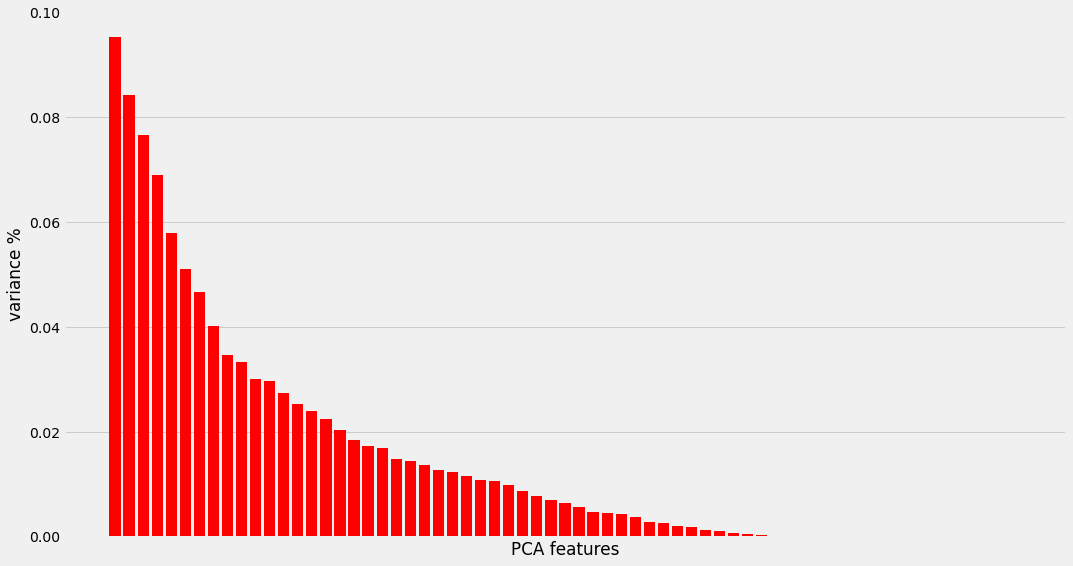

In [43]:
features = range(pca.n_components_)
plt.figure(figsize = (16,9))
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks([])
plt.show()

In [44]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09535159, 0.17958029, 0.25631569, 0.32540972, 0.38332771,
       0.43438762, 0.48117306, 0.52131913, 0.55593565, 0.58926925,
       0.61936861, 0.64904893, 0.67639515, 0.70180614, 0.72580808,
       0.74820222, 0.76859471, 0.78714884, 0.80446627, 0.82131378,
       0.83616486, 0.85067708, 0.86436417, 0.87714264, 0.88958255,
       0.90112209, 0.91201371, 0.92259637, 0.93256528, 0.94136961,
       0.94918665, 0.95626907, 0.96268558, 0.96844925, 0.97327031,
       0.97789474, 0.98226903, 0.98608076, 0.9889475 , 0.99156748,
       0.99363554, 0.99559407, 0.99697851, 0.99806763, 0.99876375,
       0.99923727, 0.99957143, 0.99979421, 0.99991053, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [45]:
pca = PCA(n_components=27,whiten=True)
pca = pca.fit(X_PRE)
X_PCA = pca.transform(X_PRE)

In [46]:
# train-test split 
SEED=12

X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test=train_test_split(X_PCA,y_pre, test_size=0.2, random_state=SEED)

In [47]:
X_PCA_train.shape, X_PCA_test.shape, y_PCA_train.shape, y_PCA_test.shape

((305, 27), (77, 27), (305,), (77,))

In [48]:
models={'KNN': KNN(), 
        'DT': DT(), 
        'SVR': SVR(), 
        'RF': RF(random_state=SEED),
        'XGB': XGB(random_state=SEED)}

parameters={'KNN':{'n_neighbors':[i for i in range(3,50)]}, 
           'DT':{'max_depth':[i for i in range(1,25)]}, 
           'SVR':{'kernel':['linear', 'poly', 'rbf'], 'C':[i for i in range(101)],
                  'epsilon':[0.0001, 0.001, 0.01, 0.1], 'gamma':['scale','auto']},
           'RF':{'n_estimators':[i for i in range(10,100)],  
                'max_depth':[i for i in range(1,25)], 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]},
           'XGB':{'n_estimators':[i for i in range(10,100)],  
                'max_depth':[i for i in range(1,25)], 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}}

In [49]:
cval={}
for model in models.keys():
    cval[model]=RSCV(models[model], parameters[model], cv=10, scoring='neg_mean_absolute_error')
    cval[model].fit(X_PCA_train, y_PCA_train)
    print('The best parameters for '+model+' are: {}'.format(cval[model].best_params_))

The best parameters for KNN are: {'n_neighbors': 32}
The best parameters for DT are: {'max_depth': 2}
The best parameters for SVR are: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 100}
The best parameters for RF are: {'n_estimators': 61, 'max_features': 0.5, 'max_depth': 22}
The best parameters for XGB are: {'n_estimators': 54, 'max_features': 0.8, 'max_depth': 1}


In [50]:
models['KNN']=cval['KNN'].best_estimator_

models['DT']=cval['DT'].best_estimator_

models['SVR']=cval['SVR'].best_estimator_

models['RF']=cval['RF'].best_estimator_

models['XGB']=cval['XGB'].best_estimator_

In [51]:
named_estimators = [ ("RF", models['RF']), ("XGB", models['XGB'])]
voting_rgr = VotingRegressor(named_estimators)
models['VRGR']=voting_rgr.fit(X_PCA_train, y_PCA_train)

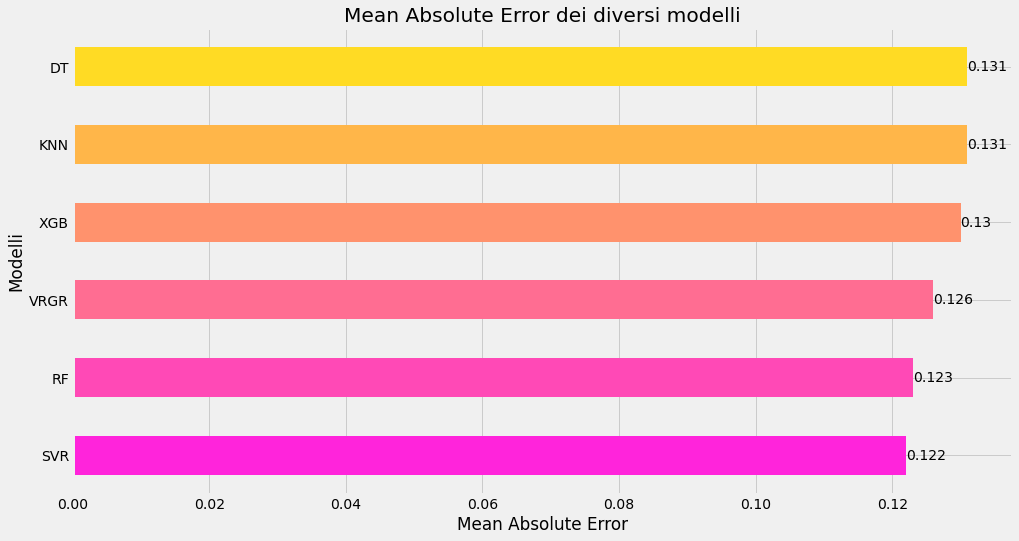

In [52]:
y_pred={}
errors={}
for model in models.keys():
    y_pred[model]=models[model].predict(X_PCA_test)
    errors[model]=round(MAE(y_PCA_test, y_pred[model]),3)
    
plt.figure(figsize=(15,8))
ax=pd.Series(errors).sort_values().plot(kind='barh', rot=0, color=sns.color_palette('spring'), 
                    title='Mean Absolute Error dei diversi modelli')

for container in ax.containers:
    ax.bar_label(container)    
plt.xlabel('Mean Absolute Error')
plt.ylabel('Modelli')
plt.show()

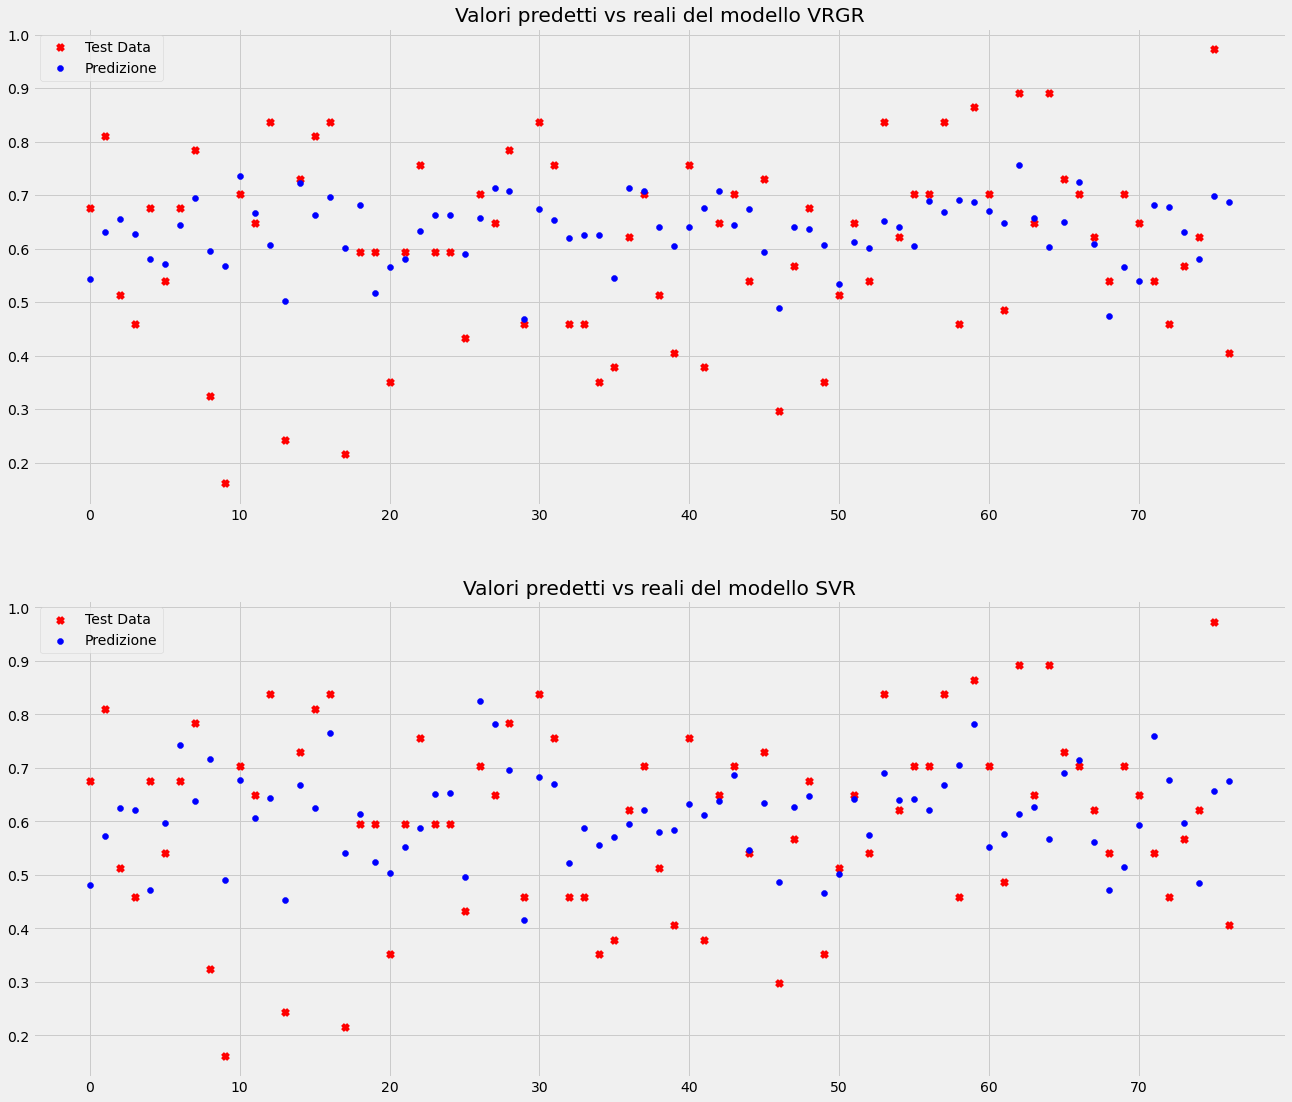

In [53]:
f, axes=plt.subplots(2,1, figsize=(20,18))

plt.subplot(2,1,1)
plt.scatter([i for i in range(len(y_test))], y_PCA_test, label='Test Data', marker='x' ,color='red')
plt.scatter([i for i in range(len(y_test))], y_pred['VRGR'], label='Predizione', marker='o' ,color='blue')
plt.title('Valori predetti vs reali del modello VRGR')
plt.legend()

plt.subplot(2,1,2)
plt.scatter([i for i in range(len(y_test))], y_PCA_test, label='Test Data', marker='x' ,color='red')
plt.scatter([i for i in range(len(y_test))], y_pred['SVR'], label='Predizione', marker='o' ,color='blue')
plt.title('Valori predetti vs reali del modello SVR')
plt.legend()

plt.show()

## Unsupervised Learning: Clustering

In [54]:
data3['Alcool'] = ((data3['Dalc_x']+ data3['Walc_x']+data3['Dalc_y']+data3['Walc_y'])/4).astype(int)
data3['Media'] = ((data3["G3_x"] + data3["G3_y"])/2).astype(int)
#Correlazione maggiore tra assunzione alcolica nel weekend e nei giorni lavorativi 
#e l'educazione dei genitori e la possibilità di uscire fuori

In [55]:
spec = data3[['Alcool','Media','Medu','Fedu']]

In [56]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Alcool  382 non-null    int32
 1   Media   382 non-null    int32
 2   Medu    382 non-null    int64
 3   Fedu    382 non-null    int64
dtypes: int32(2), int64(2)
memory usage: 11.9 KB


## KMeans

Text(0, 0.5, 'WCCS')

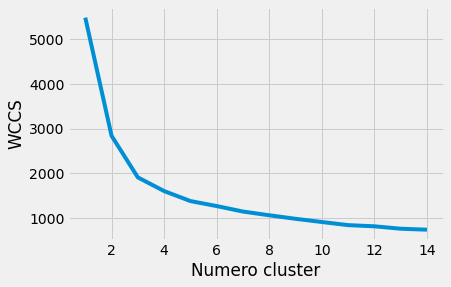

In [57]:
#metodo del gomito
wccs = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(spec)
    wccs.append(kmeans.inertia_)
plt.plot(range(1,15),wccs)
plt.xlabel('Numero cluster')
plt.ylabel('WCCS') 

In [58]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
km = kmeans.fit_predict(spec)
pan = []
for i in range(6):
    pan.append(km == i)
for i in range(6):
    print('Custer{} ha {}'.format(i,data3[pan[i]].shape[0]))

Custer0 ha 73
Custer1 ha 54
Custer2 ha 52
Custer3 ha 68
Custer4 ha 69
Custer5 ha 66


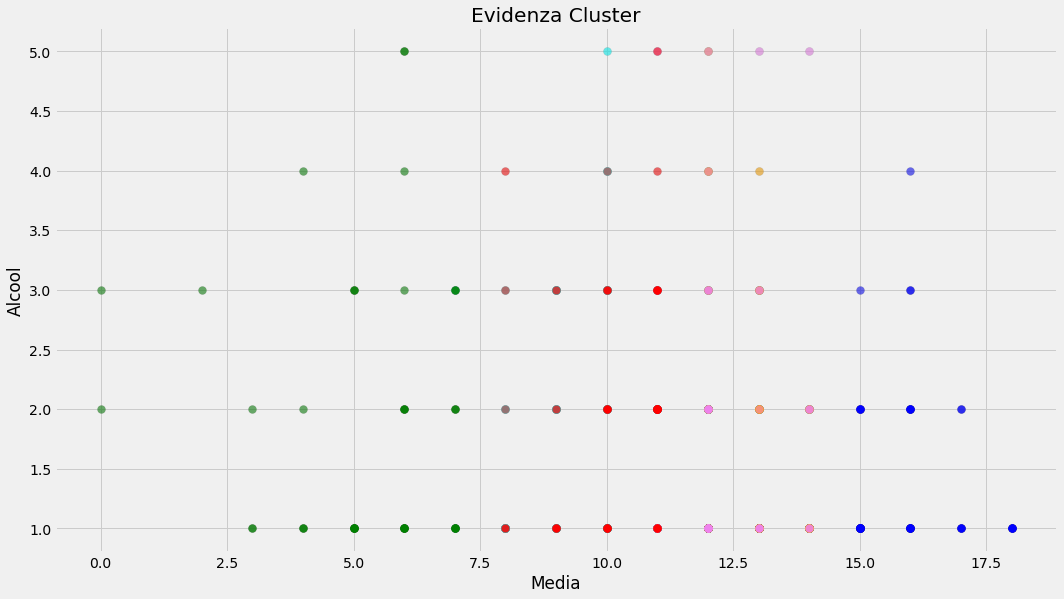

In [59]:
# j = 0
plt.figure(figsize=(16,9))
plt.scatter(spec.Media, spec.Alcool, c='grey', alpha=0.3, s=65)

plt.scatter(spec[pan[0]].Media, spec[pan[0]].Alcool, facecolor='orange', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.scatter(spec[pan[1]].Media, spec[pan[1]].Alcool, facecolor='cyan', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)
    
plt.scatter(spec[pan[2]].Media, spec[pan[2]].Alcool, facecolor='green', s=65, alpha=0.5, 
           edgecolors='black', linewidth=0)

plt.scatter(spec[pan[3]].Media, spec[pan[3]].Alcool, facecolor='violet', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.scatter(spec[pan[4]].Media, spec[pan[4]].Alcool, facecolor='red', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.scatter(spec[pan[5]].Media, spec[pan[5]].Alcool, facecolor='blue', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.xlabel('Media')
plt.ylabel('Alcool')
plt.title('Evidenza Cluster')
plt.show()

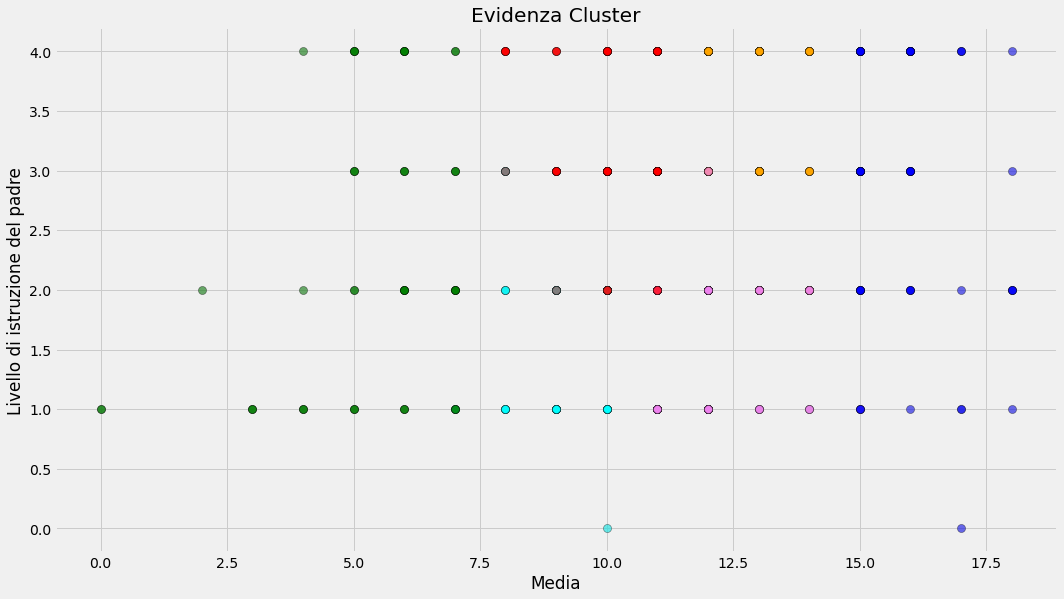

In [60]:
# j = 0
plt.figure(figsize=(16,9))
plt.scatter(spec.Media, spec.Fedu, c='grey', alpha=0.3, s=65)

plt.scatter(spec[pan[0]].Media, spec[pan[0]].Fedu, facecolor='orange', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[pan[1]].Media, spec[pan[1]].Fedu, facecolor='cyan', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)
    
plt.scatter(spec[pan[2]].Media, spec[pan[2]].Fedu, facecolor='green', s=65, alpha=0.5, 
           edgecolors='black', linewidth=0.5)

plt.scatter(spec[pan[3]].Media, spec[pan[3]].Fedu, facecolor='violet', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[pan[4]].Media, spec[pan[4]].Fedu, facecolor='red', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[pan[5]].Media, spec[pan[5]].Fedu, facecolor='blue', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.xlabel('Media')
plt.ylabel('Livello di istruzione del padre')
plt.title('Evidenza Cluster')
plt.show()

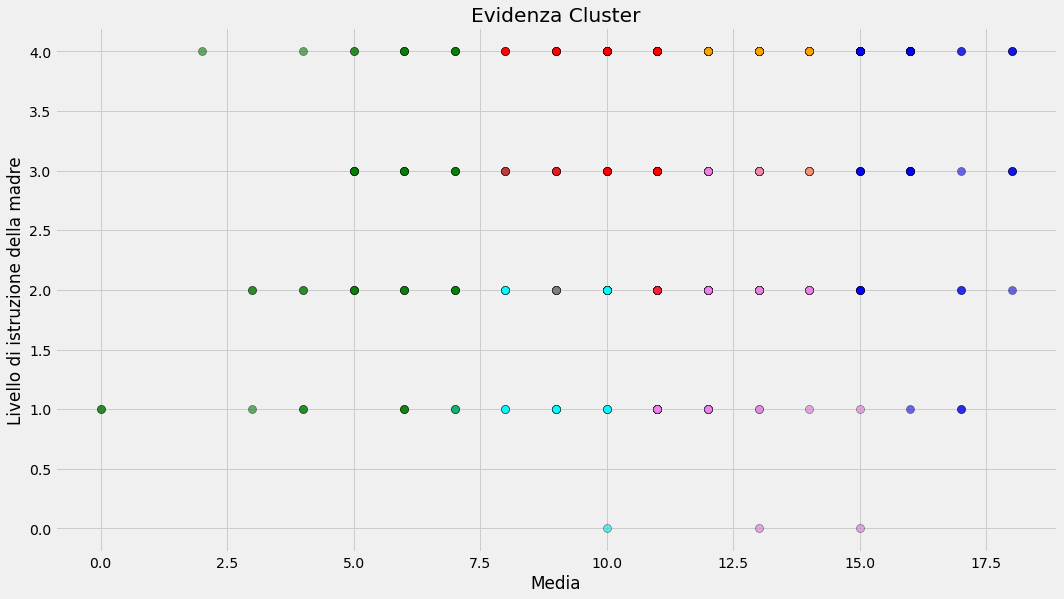

In [61]:
# j = 0
plt.figure(figsize=(16,9))
plt.scatter(spec.Media, spec.Medu, c='grey', alpha=0.3, s=65)

plt.scatter(spec[pan[0]].Media, spec[pan[0]].Medu, facecolor='orange', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[pan[1]].Media, spec[pan[1]].Medu, facecolor='cyan', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)
    
plt.scatter(spec[pan[2]].Media, spec[pan[2]].Medu, facecolor='green', s=65, alpha=0.5, 
           edgecolors='black', linewidth=0.5)

plt.scatter(spec[pan[3]].Media, spec[pan[3]].Medu, facecolor='violet', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[pan[4]].Media, spec[pan[4]].Medu, facecolor='red', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[pan[5]].Media, spec[pan[5]].Medu, facecolor='blue', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.xlabel('Media')
plt.ylabel('Livello di istruzione della madre')
plt.title('Evidenza Cluster')
plt.show()

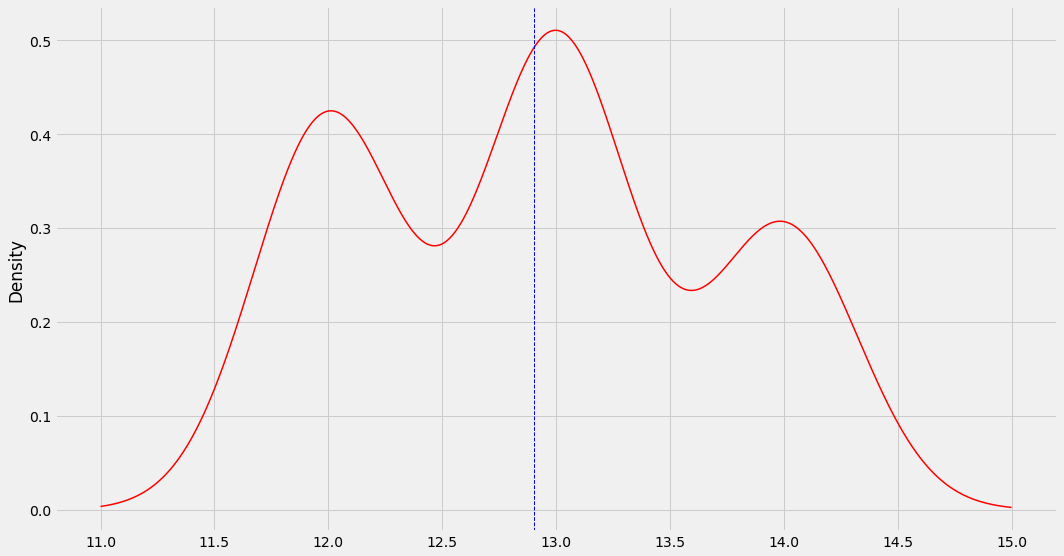

12.904109589041095

In [62]:
j = 0
plt.figure(figsize=(16,9))
spec[pan[j]]['Media'].plot(kind='density', linewidth=1.5, color='r')
plt.axvline(spec[pan[j]]['Media'].mean(), c='b', linewidth=1, ls='--')
plt.show()
spec[pan[j]]['Media'].mean()

## HDBSCAN

In [63]:
%%time
clu1 = HDBSCAN(min_cluster_size=30, metric='euclidean', cluster_selection_method='leaf', min_samples=1)
clu1.fit(spec)
pd.DataFrame(clu1.labels_).iloc[:, 0].value_counts()

CPU times: total: 15.6 ms
Wall time: 9.17 ms


-1    132
 4     62
 0     53
 2     39
 3     36
 1     30
 5     30
Name: 0, dtype: int64

In [64]:
wc = []
yk = clu1.fit_predict(spec)

for i in range(6):
    wc.append(yk==i)

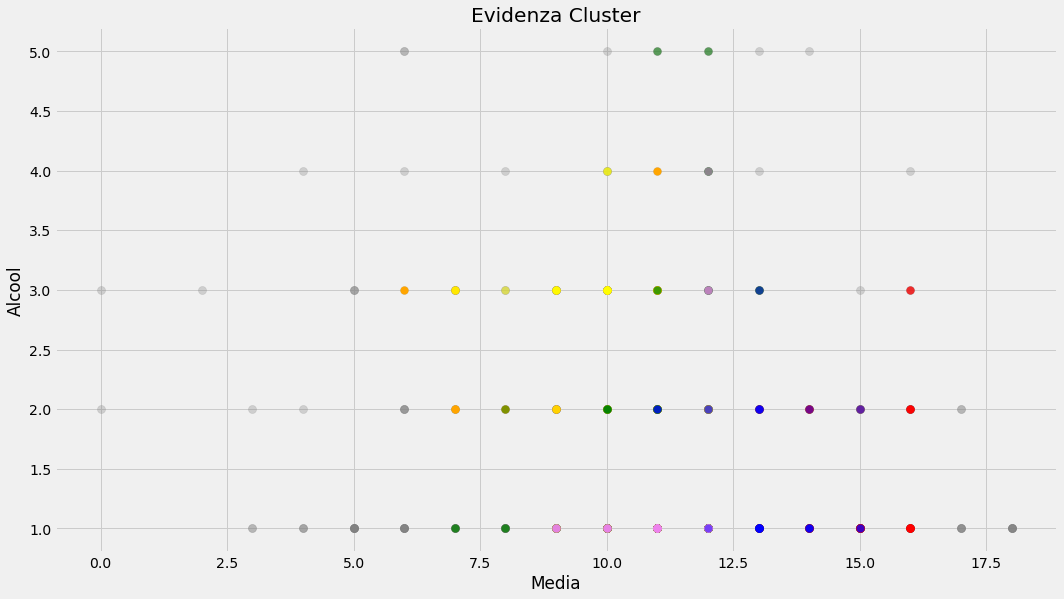

In [65]:
# j = 0
plt.figure(figsize=(16,9))
plt.scatter(spec.Media, spec.Alcool, c='grey', s=65,alpha=0.3 )

plt.scatter(spec[wc[0]].Media, spec[wc[0]].Alcool, facecolor='orange', s=65, 
       edgecolors='black', linewidth=0)

plt.scatter(spec[wc[1]].Media, spec[wc[1]].Alcool, facecolor='yellow', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)
    
plt.scatter(spec[wc[2]].Media, spec[wc[2]].Alcool, facecolor='green', s=65, alpha=0.5, 
           edgecolors='black', linewidth=0)

plt.scatter(spec[wc[3]].Media, spec[wc[3]].Alcool, facecolor='violet', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.scatter(spec[wc[4]].Media, spec[wc[4]].Alcool, facecolor='red', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.scatter(spec[wc[5]].Media, spec[wc[5]].Alcool, facecolor='blue', s=65, alpha=0.5, 
          edgecolors='black', linewidth=0)

plt.xlabel('Media')
plt.ylabel('Alcool')
plt.title('Evidenza Cluster')
plt.show()

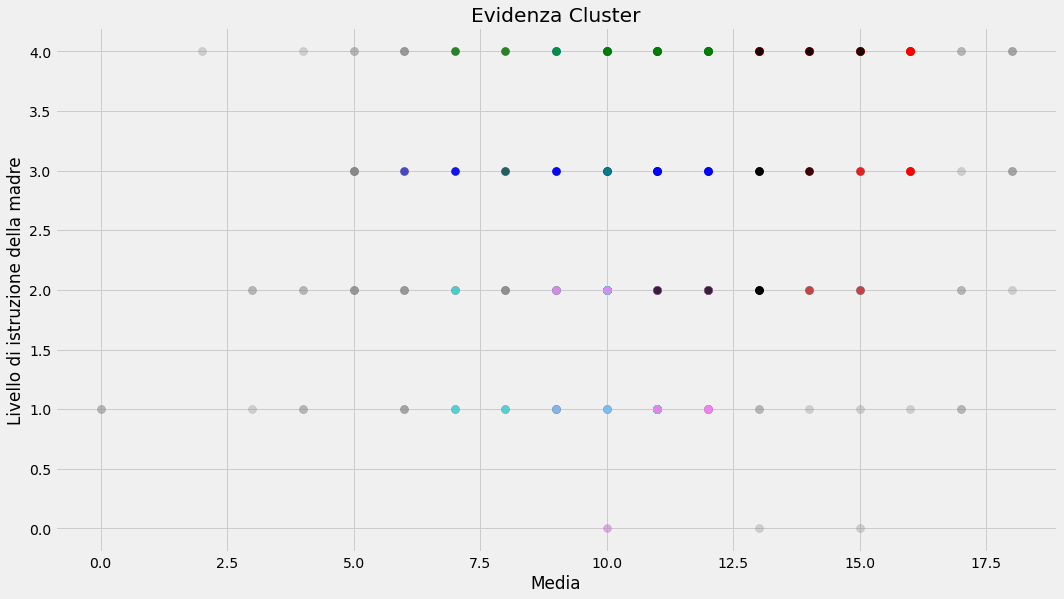

In [66]:
# j = 0
plt.figure(figsize=(16,9))
plt.scatter(spec.Media, spec.Medu, c='grey', alpha=0.3, s=65)

plt.scatter(spec[wc[0]].Media, spec[wc[0]].Medu, facecolor='blue', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.scatter(spec[wc[1]].Media, spec[wc[1]].Medu, facecolor='cyan', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)
    
plt.scatter(spec[wc[2]].Media, spec[wc[2]].Medu, facecolor='green', s=65, alpha=0.5, 
           edgecolors='black', linewidth=0)

plt.scatter(spec[wc[3]].Media, spec[wc[3]].Medu, facecolor='violet', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.scatter(spec[wc[4]].Media, spec[wc[4]].Medu, facecolor='red', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.scatter(spec[wc[5]].Media, spec[wc[5]].Medu, facecolor='black', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0)

plt.xlabel('Media')
plt.ylabel('Livello di istruzione della madre')
plt.title('Evidenza Cluster')
plt.show()

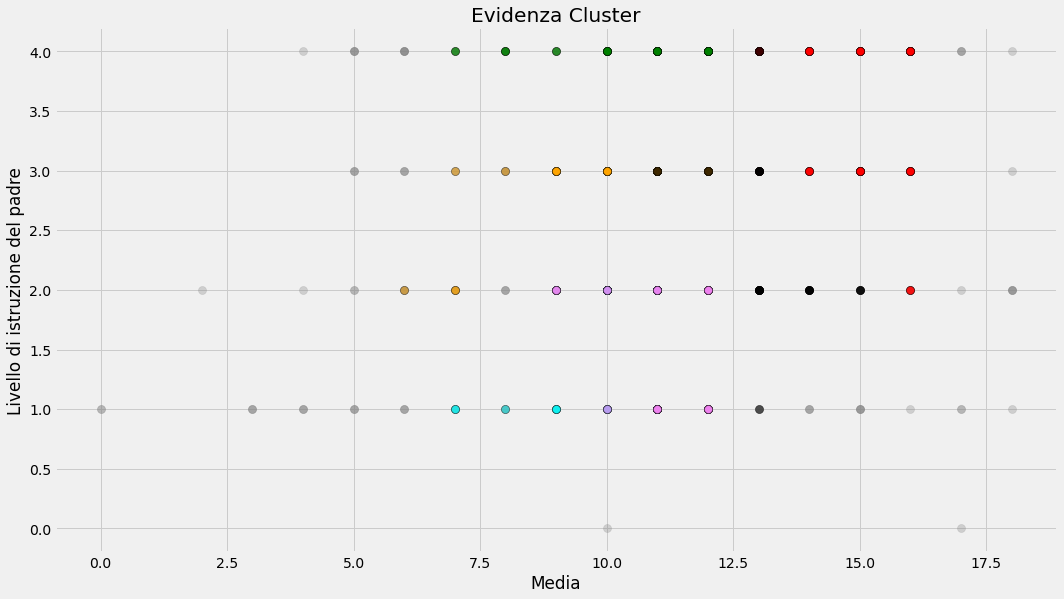

In [67]:
# j = 0
plt.figure(figsize=(16,9))
plt.scatter(spec.Media, spec.Fedu, c='grey', alpha=0.3, s=65)

plt.scatter(spec[wc[0]].Media, spec[wc[0]].Fedu, facecolor='orange', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[wc[1]].Media, spec[wc[1]].Fedu, facecolor='cyan', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)
    
plt.scatter(spec[wc[2]].Media, spec[wc[2]].Fedu, facecolor='green', s=65, alpha=0.5, 
           edgecolors='black', linewidth=0.5)

plt.scatter(spec[wc[3]].Media, spec[wc[3]].Fedu, facecolor='violet', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[wc[4]].Media, spec[wc[4]].Fedu, facecolor='red', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.scatter(spec[wc[5]].Media, spec[wc[5]].Fedu, facecolor='black', s=65, alpha=0.5, 
            edgecolors='black', linewidth=0.5)

plt.xlabel('Media')
plt.ylabel('Livello di istruzione del padre')
plt.title('Evidenza Cluster')
plt.show()

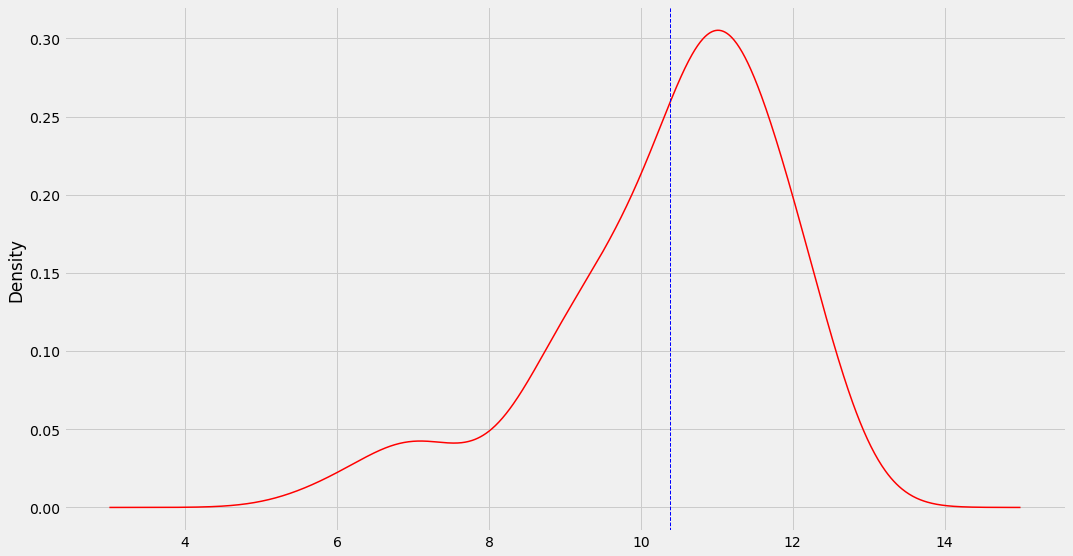

10.377358490566039

In [68]:
j = 0
plt.figure(figsize=(16,9))
spec[wc[j]]['Media'].plot(kind='density', linewidth=1.5, color='r')
plt.axvline(spec[wc[j]]['Media'].mean(), c='b', linewidth=1, ls='--')
plt.show()
spec[wc[j]]['Media'].mean()

## Conclusioni

1. I modelli migliori risultano L'ensamble e RF per l'esercizio senza PCA. I modelli che hanno un risultato peggiore hanno un MAE che si aggira intorno a 2.45 e 2.33

2. Con PCA i modelli con un risultato migliore risultano sempre l'ensamle e SVR.

3. Dall'EDA si è evinto che le features strettamente correlate al consumo di alcolici sono state l'educazione di madre e padre, il travel time, e lo studio.
